In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm #progress bar
import rdkit
from rdkit import Chem #Chemistry
from rdkit.Chem import rdMolDescriptors #molecular descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
rdkit.__version__


/Users/NathanJiang/opt/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'2023.03.2'

In [9]:
import xgboost
import sklearn
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #ML training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error #ML stats
#from yellowbrick.regressor import prediction_error, ResidualsPlot
from tdc.single_pred import ADME
from tdc.benchmark_group import admet_group
from tdc import BenchmarkGroup
import warnings
warnings.filterwarnings("ignore")

In [3]:
def get_rdkit(smiles_string):
    mol = Chem.MolFromSmiles(smiles_string)
    chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']
    mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
    return list(mol_descriptor_calculator.CalcDescriptors(mol))
    

In [94]:
group = admet_group(path = 'data/')
predictions_list_xgb = []
best_params_list_xgb = []
predictions_list_rf = []
predictions_list_svm = []
best_params_list_svm = []
predictions_list_adb = []
predictions_list_cnn = []

for seed in [1, 2, 3, 4, 5]:
    predictions_xgb = {}
    predictions_rf = {}
    predictions_svm = {}
    predictions_adb = {}
    predictions_cnn = {}

    benchmark = group.get('Lipophilicity_AstraZeneca')
    name = benchmark['name']
    train_val, test = benchmark['train_val'], benchmark['test']
    train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
    
    nBits=200
    rdkit_des = [get_rdkit(smile) for smile in train['Drug']]
    rdkit_name = [f'Bit_{i}' for i in range(nBits)]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = train['Y']
    train = pd.DataFrame(rdkit_bits, index = train.Drug, columns=rdkit_name).reset_index(drop = False)
    train['Y'] = Y
    train = train.dropna(axis=1)
    
    rdkit_des = [get_rdkit(smile) for smile in test['Drug']]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = test['Y']
    test = pd.DataFrame(rdkit_bits, index = test.Drug, columns=rdkit_name).reset_index(drop = False)
    test['Y'] = Y
    test = test.drop(["Bit_39","Bit_41","Bit_43","Bit_45"],axis=1)

    train_X = train.drop(columns = ["Drug","Y"])
    train_y = train.Y
    test_X = test.drop(columns = ["Drug","Y"])
    test_y = test.Y

    
    #XGBoost + RDKit
    xgb_parameters = {'objective':['reg:squarederror'],
            'booster':['gbtree','gblinear'],
            'learning_rate': [0.1],
            'max_depth': [7,10,15,20],
            'min_child_weight': [10,15,20,25],
            'colsample_bytree': [0.8, 0.9, 1],
            'n_estimators': [300,400,500,600],
            "reg_alpha"   : [0.5,0.2,1],
            "reg_lambda"  : [2,3,5],
            "gamma"       : [1,2,3]}

    xgb_model = XGBRegressor()
    grid_obj_xgb = RandomizedSearchCV(xgb_model, xgb_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_xgb.fit(train_X, train_y, verbose = 1)
    y_pred_test_xgb = grid_obj_xgb.predict(test_X)
    bp_xgb = grid_obj_xgb.best_params_
    predictions_xgb[name] = y_pred_test_xgb
    predictions_list_xgb.append(predictions_xgb)
    best_params_list_xgb.append(bp_xgb)

    #Random Forest + RDKit
    rf_model = RandomForestRegressor()
    rf_model.fit(train_X, train_y)
    y_pred_test_rf = rf_model.predict(test_X)
    predictions_rf[name] = y_pred_test_rf
    predictions_list_rf.append(predictions_rf)

    #SVM + RDKit
    svm_parameters = {
        'C': [0.1, 1, 10, 100, 1000],
        'epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
    }
    svm_model = SVR(kernel="rbf")
    grid_obj_svm = RandomizedSearchCV(svm_model, svm_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_svm.fit(train_X, train_y)
    y_pred_test_svm = grid_obj_svm.predict(test_X)
    bp_svm = grid_obj_svm.best_params_
    predictions_svm[name] = y_pred_test_svm
    predictions_list_svm.append(predictions_svm)
    best_params_list_svm.append(bp_svm)

    # AdaBoost + RDkit
    DTR = DecisionTreeRegressor(max_depth=4)
    adb_model = AdaBoostRegressor(n_estimators=300, base_estimator=DTR, learning_rate=1)
    adb_model.fit(train_X, train_y)
    y_pred_test_adb = adb_model.predict(test_X)
    predictions_adb[name] = y_pred_test_adb
    predictions_list_adb.append(predictions_adb)
    

    #CNN + RDkit
    train_X = train_X.to_numpy()
    test_X = test_X.to_numpy()
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
    cnn_model = Sequential()
    cnn_model.add(Conv1D(32, 2, activation="tanh", input_shape=(196,1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="tanh"))
    cnn_model.add(Dense(1))
    opt = keras.optimizers.RMSprop(learning_rate=0.001,clipnorm=2)
    cnn_model.compile(loss="mse", optimizer=opt)
    cnn_model.fit(train_X, train_y, batch_size=128, epochs=10, verbose=0)
    y_pred_test_cnn = cnn_model.predict(test_X)
    predictions_cnn[name] = y_pred_test_cnn
    predictions_list_cnn.append(predictions_cnn)

xgb_results = group.evaluate_many(predictions_list_xgb)
rf_results = group.evaluate_many(predictions_list_rf)
svm_results = group.evaluate_many(predictions_list_svm)
adb_results = group.evaluate_many(predictions_list_adb)
cnn_results = group.evaluate_many(predictions_list_cnn)


Found local copy...
generating training, validation splits...
100%|██████████| 3360/3360 [00:01<00:00, 2194.26it/s]


27/27 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 3360/3360 [00:01<00:00, 2199.12it/s]


27/27 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 3360/3360 [00:01<00:00, 2193.68it/s]


27/27 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 3360/3360 [00:01<00:00, 2165.53it/s]


27/27 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 3360/3360 [00:01<00:00, 2151.94it/s]


27/27 [==============================] - 0s 1ms/step


In [55]:
xgb_results

{'lipophilicity_astrazeneca': [0.597, 0.008]}

In [40]:
rf_results

{'lipophilicity_astrazeneca': [0.637, 0.007]}

In [41]:
svm_results

{'lipophilicity_astrazeneca': [0.937, 0.011]}

In [42]:
adb_results

{'lipophilicity_astrazeneca': [0.735, 0.013]}

In [95]:
cnn_results

{'lipophilicity_astrazeneca': [0.798, 0.057]}

In [114]:
predictions_list_cnn = [{'lipophilicity_astrazeneca': np.array([3.1261    ,
         3.066104  ,
         3.0991406 ,
         2.368437  ,
         3.1162555 ,
         2.999641  ,
         2.7499218 ,
         2.7854877 ,
         2.4276133 ,
         2.0869563 ,
         2.6008132 ,
         3.3011844 ,
         3.1754775 ,
         3.3942637 ,
         3.2255912 ,
         2.8499804 ,
         1.1337998 ,
         3.0150266 ,
         2.7107773 ,
         3.0758233 ,
         3.599799  ,
         3.2638865 ,
         3.191032  ,
         3.2162704 ,
         3.042049  ,
         3.2846189 ,
         0.95670044,
         0.96830523,
         1.6999478 ,
         2.3081703 ,
         1.0127468 ,
         2.7414668 ,
         2.8499572 ,
         3.1353974 ,
         2.991738  ,
         2.9943655 ,
         3.127519  ,
         3.2997634 ,
         2.7964838 ,
         2.3607535 ,
         3.2469673 ,
         2.7583113 ,
         3.249277  ,
         2.9951153 ,
         3.3277762 ,
         3.1465788 ,
         2.927348  ,
         3.1251578 ,
         3.2339902 ,
         2.8186793 ,
         1.5264163 ,
         1.1605903 ,
         2.5741239 ,
         2.9406042 ,
         2.8624268 ,
         3.3814101 ,
         3.2039568 ,
         2.6086373 ,
         3.4153175 ,
         2.5858276 ,
         2.6347058 ,
         3.305568  ,
         2.6874936 ,
         3.1362338 ,
         2.8895268 ,
         3.0093832 ,
         2.7955394 ,
         3.203851  ,
         2.9170308 ,
         2.7955394 ,
         2.798236  ,
         2.9957767 ,
         2.7955394 ,
         2.8016448 ,
         2.8035946 ,
         2.7955394 ,
         2.7569108 ,
         2.9553938 ,
         2.773497  ,
         3.368716  ,
         1.381911  ,
         2.5892258 ,
         2.883046  ,
         3.3260217 ,
         2.8343024 ,
         3.1963477 ,
         2.9374704 ,
         2.9049473 ,
         2.3166122 ,
         3.0376291 ,
         3.310978  ,
         3.258752  ,
         2.9946012 ,
         3.418756  ,
         3.4431975 ,
         2.8475397 ,
         3.1469498 ,
         3.118699  ,
         2.315409  ,
         3.08751   ,
         3.3744333 ,
         1.1152207 ,
         1.1152207 ,
         3.3955112 ,
         3.225055  ,
         3.257337  ,
         3.0941029 ,
         3.0951319 ,
         3.002386  ,
         3.1680722 ,
         2.3990989 ,
         2.8893797 ,
         2.598001  ,
         3.1398022 ,
         2.5908256 ,
         2.8911517 ,
         1.8520875 ,
         2.700266  ,
         2.6083512 ,
         2.6489909 ,
         2.590498  ,
         2.9968147 ,
         2.772103  ,
         3.519919  ,
         2.4133086 ,
         1.7931108 ,
         1.7482325 ,
         2.7909179 ,
         2.749276  ,
         1.3929393 ,
         1.8958489 ,
         2.8931737 ,
         3.0215812 ,
         3.115028  ,
         3.1310973 ,
         3.1438973 ,
         3.436163  ,
         3.5357785 ,
         2.9170868 ,
         3.0276442 ,
         3.2279434 ,
         3.0872893 ,
         3.0855045 ,
         3.0523179 ,
         3.0492153 ,
         3.143294  ,
         3.1691918 ,
         3.1082025 ,
         3.1266832 ,
         1.101291  ,
         2.8627234 ,
         3.348096  ,
         3.5182042 ,
         3.160751  ,
         3.1779377 ,
         2.9769194 ,
         3.1764894 ,
         3.2287662 ,
         2.6974554 ,
         3.134439  ,
         3.0095315 ,
         2.8948438 ,
         3.2003715 ,
         3.1568737 ,
         3.271774  ,
         2.1912963 ,
         1.105435  ,
         2.2711284 ,
         2.359272  ,
         3.3137252 ,
         3.058688  ,
         3.0863702 ,
         2.8245788 ,
         2.4831867 ,
         3.1294634 ,
         3.0362253 ,
         3.0067744 ,
         2.484565  ,
         3.2376053 ,
         3.353663  ,
         2.8615928 ,
         2.788479  ,
         3.311884  ,
         3.206783  ,
         3.311884  ,
         2.4136848 ,
         3.3444064 ,
         3.0171447 ,
         1.3593676 ,
         3.214513  ,
         3.1459942 ,
         3.0273113 ,
         2.6086147 ,
         2.6086147 ,
         3.3053195 ,
         3.005534  ,
         2.6043277 ,
         3.2698083 ,
         2.8345485 ,
         2.8974001 ,
         3.0092795 ,
         3.2575192 ,
         2.9693518 ,
         2.9122965 ,
         3.3084812 ,
         3.2601323 ,
         2.8084176 ,
         2.97456   ,
         3.0142417 ,
         2.5140977 ,
         2.4938884 ,
         2.5335605 ,
         2.8169265 ,
         3.1479192 ,
         2.746157  ,
         2.787725  ,
         3.0360236 ,
         3.429295  ,
         2.534944  ,
         3.3219008 ,
         2.7162457 ,
         3.4278688 ,
         3.4769561 ,
         3.4924643 ,
         3.0905027 ,
         2.9782188 ,
         1.6261425 ,
         3.2270288 ,
         3.155385  ,
         3.2166734 ,
         3.011455  ,
         3.010189  ,
         3.0448623 ,
         3.0437746 ,
         3.031745  ,
         3.0103028 ,
         2.8929663 ,
         3.0805717 ,
         2.8840542 ,
         3.1353421 ,
         3.3962815 ,
         3.4050028 ,
         3.229727  ,
         3.2172227 ,
         3.2055607 ,
         2.9948874 ,
         3.0028381 ,
         3.0047257 ,
         2.9969347 ,
         2.9747024 ,
         3.0309844 ,
         2.8285942 ,
         3.4061844 ,
         2.3626559 ,
         2.9621243 ,
         2.8911664 ,
         2.9903111 ,
         2.9889636 ,
         2.9953356 ,
         2.92835   ,
         2.7398844 ,
         2.994968  ,
         2.8266196 ,
         2.9785619 ,
         2.9785004 ,
         2.9678335 ,
         2.7794585 ,
         2.7794585 ,
         2.976916  ,
         2.7794585 ,
         2.8072975 ,
         3.3491237 ,
         2.5479498 ,
         2.8945327 ,
         3.2536373 ,
         3.2536373 ,
         2.91475   ,
         2.9243062 ,
         2.9261036 ,
         2.6778088 ,
         2.9841    ,
         3.3885899 ,
         3.4411552 ,
         2.900339  ,
         2.722486  ,
         3.233432  ,
         3.1076856 ,
         2.988648  ,
         2.1593907 ,
         2.7927084 ,
         3.30791   ,
         3.1861553 ,
         3.0469184 ,
         2.872642  ,
         3.1584666 ,
         2.776471  ,
         3.0267425 ,
         3.219558  ,
         2.4605527 ,
         2.3124144 ,
         3.1305273 ,
         3.1325085 ,
         3.2643993 ,
         3.5217056 ,
         2.8790338 ,
         2.8790338 ,
         2.8790338 ,
         3.1167383 ,
         3.1338034 ,
         3.3097558 ,
         3.1971984 ,
         2.5961912 ,
         3.056068  ,
         3.052095  ,
         3.0494318 ,
         1.6105204 ,
         2.7853994 ,
         3.4718554 ,
         3.0620248 ,
         3.0132768 ,
         2.225308  ,
         3.0232177 ,
         3.1729438 ,
         3.050157  ,
         3.0444164 ,
         3.354466  ,
         2.9970677 ,
         2.9339485 ,
         2.564285  ,
         3.0100086 ,
         3.0248995 ,
         2.023055  ,
         3.004202  ,
         3.3451314 ,
         2.6992025 ,
         2.7852025 ,
         2.8015602 ,
         2.3786964 ,
         2.8104465 ,
         2.8069606 ,
         2.69459   ,
         2.28189   ,
         3.288395  ,
         3.2647243 ,
         3.5026438 ,
         3.024652  ,
         3.0876172 ,
         1.4286454 ,
         2.8550713 ,
         2.9920897 ,
         2.8657546 ,
         3.002407  ,
         3.4381657 ,
         3.0675068 ,
         3.4007244 ,
         2.1723485 ,
         2.1428509 ,
         1.7485774 ,
         1.5504667 ,
         1.3075858 ,
         1.4319102 ,
         1.1840022 ,
         1.5912584 ,
         1.6123185 ,
         1.3103832 ,
         3.095397  ,
         2.9520473 ,
         3.1600785 ,
         2.634346  ,
         2.634346  ,
         2.993682  ,
         3.4913054 ,
         2.901349  ,
         2.8365905 ,
         2.489839  ,
         2.9493155 ,
         2.492878  ,
         2.9231002 ,
         3.3034594 ,
         3.355963  ,
         2.2463782 ,
         3.153604  ,
         3.1937242 ,
         3.1316571 ,
         3.3238935 ,
         3.3062022 ,
         3.341207  ,
         3.3173962 ,
         3.1386132 ,
         3.0438995 ,
         2.7860372 ,
         1.3364885 ,
         3.2284355 ,
         3.0629084 ,
         3.043703  ,
         1.3112648 ,
         3.7494268 ,
         3.645247  ,
         3.1768627 ,
         3.6636477 ,
         3.5399647 ,
         3.9251537 ,
         3.6991243 ,
         3.5144873 ,
         3.2318416 ,
         2.938816  ,
         3.5126672 ,
         3.6458693 ,
         2.9995651 ,
         3.7589316 ,
         2.6255455 ,
         3.2997215 ,
         3.194633  ,
         3.3972094 ,
         3.1138062 ,
         3.2495735 ,
         3.3405266 ,
         2.3245091 ,
         2.8704538 ,
         2.9998784 ,
         3.4481816 ,
         3.6299787 ,
         3.2148275 ,
         3.2365673 ,
         3.105635  ,
         3.052487  ,
         3.0402346 ,
         1.2196236 ,
         2.8223825 ,
         1.1823108 ,
         2.8488774 ,
         3.43574   ,
         3.3900917 ,
         3.0061874 ,
         2.8503842 ,
         2.9692667 ,
         3.3826103 ,
         3.399356  ,
         0.842245  ,
         2.7052665 ,
         3.0400763 ,
         3.1609373 ,
         1.5002508 ,
         3.1565516 ,
         2.1325805 ,
         3.009365  ,
         3.052279  ,
         3.1796231 ,
         3.0071125 ,
         3.173118  ,
         3.010129  ,
         2.8131285 ,
         2.9642203 ,
         0.7853763 ,
         3.171832  ,
         3.1321735 ,
         2.592235  ,
         3.0230541 ,
         2.8641024 ,
         3.229497  ,
         3.3129892 ,
         3.522502  ,
         3.3971276 ,
         3.0794802 ,
         3.0430965 ,
         3.400638  ,
         2.8372977 ,
         3.1365728 ,
         2.7405195 ,
         2.7703104 ,
         3.3982167 ,
         3.1596541 ,
         3.0669289 ,
         2.434981  ,
         3.0920072 ,
         3.0052674 ,
         3.0951338 ,
         3.0887532 ,
         3.4082162 ,
         2.7157094 ,
         0.73997056,
         3.0713964 ,
         2.9363017 ,
         3.0975194 ,
         3.4162204 ,
         2.9566464 ,
         1.4486387 ,
         2.879647  ,
         3.4682777 ,
         3.3561702 ,
         3.0931916 ,
         3.1753607 ,
         2.9521742 ,
         3.206915  ,
         3.0769062 ,
         3.3203993 ,
         3.1062527 ,
         3.070373  ,
         3.0648277 ,
         2.113863  ,
         2.8611503 ,
         1.4012783 ,
         2.5614076 ,
         2.5614076 ,
         1.5891294 ,
         2.113863  ,
         1.5549287 ,
         3.354659  ,
         2.9515774 ,
         1.5295377 ,
         1.6833662 ,
         3.0435216 ,
         3.0267568 ,
         3.0086124 ,
         3.2489393 ,
         2.9404738 ,
         2.9061108 ,
         2.9948404 ,
         3.1244252 ,
         3.2807436 ,
         2.7800684 ,
         2.9781175 ,
         2.5553277 ,
         2.253134  ,
         3.0736268 ,
         3.0518258 ,
         3.3826044 ,
         2.913673  ,
         3.1210494 ,
         2.9661288 ,
         3.3287797 ,
         3.1341672 ,
         3.0668654 ,
         2.7892308 ,
         1.3056797 ,
         3.0067163 ,
         3.1382713 ,
         2.8909912 ,
         3.3584735 ,
         3.062148  ,
         2.993723  ,
         2.8951797 ,
         1.9126563 ,
         3.0058234 ,
         0.64694345,
         2.7024918 ,
         3.8364353 ,
         1.0675863 ,
         2.814776  ,
         3.1959093 ,
         3.128398  ,
         2.2447195 ,
         2.9735491 ,
         2.3746252 ,
         2.879987  ,
         3.3050098 ,
         2.2972155 ,
         3.1325698 ,
         3.2740893 ,
         2.8302774 ,
         2.7035012 ,
         2.8302774 ,
         2.8302774 ,
         3.092062  ,
         3.1367114 ,
         3.4180446 ,
         3.0885167 ,
         3.2356277 ,
         3.1139154 ,
         3.0525014 ,
         3.075285  ,
         3.0571947 ,
         3.0669203 ,
         3.0820193 ,
         2.5994275 ,
         3.0817401 ,
         2.3899536 ,
         3.0650012 ,
         3.039919  ,
         2.7925315 ,
         2.9334848 ,
         2.47628   ,
         2.9733233 ,
         3.1245356 ,
         2.9712873 ,
         3.029314  ,
         2.8777988 ,
         2.9978566 ,
         3.1146312 ,
         3.1765223 ,
         2.8983102 ,
         3.1832247 ,
         3.4216056 ,
         1.7834172 ,
         3.0301065 ,
         3.3864431 ,
         2.3821855 ,
         3.0765028 ,
         3.2312849 ,
         3.2312849 ,
         2.8682423 ,
         2.804676  ,
         3.0637336 ,
         3.0582151 ,
         3.1618247 ,
         3.1670341 ,
         3.1184294 ,
         2.365684  ,
         1.7810969 ,
         3.440225  ,
         3.2481952 ,
         3.1800642 ,
         2.9446082 ,
         2.9932213 ,
         3.1461363 ,
         2.8803587 ,
         2.6786551 ,
         2.8881283 ,
         3.0032268 ,
         3.0028205 ,
         2.5321655 ,
         2.7624125 ,
         3.0562544 ,
         3.1144447 ,
         2.7407365 ,
         3.0959706 ,
         3.072852  ,
         3.0444298 ,
         3.0091796 ,
         3.1294498 ,
         3.1430898 ,
         3.1310534 ,
         3.3816872 ,
         3.1506157 ,
         2.7886646 ,
         3.424292  ,
         3.316566  ,
         3.288732  ,
         2.640253  ,
         3.3874807 ,
         3.0871742 ,
         2.8725696 ,
         3.1819923 ,
         2.577005  ,
         2.772112  ,
         2.961474  ,
         3.0267482 ,
         2.6275125 ,
         2.856325  ,
         2.921266  ,
         3.1020238 ,
         3.742977  ,
         3.2843099 ,
         2.18721   ,
         3.403396  ,
         3.2507992 ,
         3.3346741 ,
         3.3896832 ,
         3.4152782 ,
         3.2870986 ,
         3.4043024 ,
         3.3831935 ,
         3.1939096 ,
         3.230101  ,
         3.038251  ,
         3.0749073 ,
         2.9849348 ,
         3.0963712 ,
         2.0504482 ,
         2.4878683 ,
         2.9252074 ,
         3.1204617 ,
         3.1539302 ,
         3.276669  ,
         3.132296  ,
         2.9060133 ,
         2.931418  ,
         2.6489587 ,
         3.3068185 ,
         3.282246  ,
         2.9574885 ,
         1.3399173 ,
         2.988012  ,
         2.8806078 ,
         1.830229  ,
         3.3144765 ,
         3.066822  ,
         3.1428924 ,
         3.100154  ,
         3.4828727 ,
         2.765495  ,
         2.9619837 ,
         2.8522062 ,
         2.6984317 ,
         2.7213771 ,
         3.0051508 ,
         2.70396   ,
         2.8487482 ,
         3.101386  ,
         2.9706702 ,
         2.8758166 ,
         2.903386  ,
         2.6921883 ,
         2.8524122 ,
         2.540222  ,
         2.968132  ,
         2.5920043 ,
         3.0856886 ,
         3.0462718 ,
         2.0943837 ,
         2.9091754 ,
         3.0477128 ,
         3.1847646 ,
         3.1162329 ,
         3.2669609 ,
         3.344749  ,
         3.1829681 ,
         1.31491   ,
         2.8685794 ,
         2.485425  ,
         3.1363845 ,
         3.4086912 ,
         3.2247727 ,
         3.1867707 ,
         3.2263308 ,
         3.3164039 ,
         3.094099  ,
         3.2755165 ,
         1.8076    ,
         2.8296633 ,
         3.3588917 ,
         2.9162912 ,
         2.8516178 ,
         3.1995544 ,
         0.6905873 ,
         2.6745715 ,
         2.930027  ,
         2.851542  ,
         2.980236  ,
         3.0656514 ,
         3.1006727 ,
         3.0703764 ,
         2.8834462 ,
         2.6101031 ,
         3.034494  ,
         3.0184176 ,
         2.385344  ,
         3.069049  ,
         3.006561  ,
         3.031537  ,
         3.0085053 ,
         2.9410548 ,
         3.0339208 ,
         3.0062003 ,
         3.0014024 ,
         3.008368  ,
         3.006561  ,
         3.0208592 ,
         2.9981089 ,
         2.9992304 ,
         3.0132194 ,
         3.0254018 ,
         3.2252972 ,
         2.9580803 ,
         3.5189705 ,
         1.1398706 ,
         2.1747837 ,
         1.944325  ,
         2.73879   ,
         2.0773304 ,
         2.5083685 ,
         2.9697008 ,
         3.2766998 ,
         3.140925  ,
         3.1787386 ,
         3.4157736 ,
         3.0676777 ,
         3.1313148 ,
         3.3433144 ,
         3.029461  ,
         3.0329044 ,
         3.1331902 ,
         3.1331902 ,
         3.2037287 ,
         3.0605035 ,
         2.7090845 ,
         3.3239155 ,
         1.7975286 ,
         2.5566597 ,
         3.0804987 ,
         3.1447752 ,
         3.041975  ,
         3.1334648 ,
         3.2074587 ,
         3.0752225 ,
         2.8005517 ,
         3.0111117 ,
         2.785764  ,
         2.9434886 ,
         2.97574   ,
         2.5793014 ,
         3.0733871 ,
         3.1211343 ,
         3.342717  ,
         2.9776292 ,
         3.2654061 ,
         3.1027102 ,
         3.416516  ,
         3.2631865 ,
         3.309691  ,
         3.2277799 ,
         3.2683392 ,
         3.2941842 ,
         3.2037773 ,
         3.2311254 ,
         3.1339989 ,
         3.277349  ,
         3.3068829 ,
         3.394337  ,
         3.3229122 ,
         3.2371664 ,
         3.144186  ,
         3.3337815 ,
         3.418045  ,
         3.245558  ,
         2.3681216 ,
         3.3169727 ,
         3.3169727 ,
         3.4029164 ,
         3.3703828 ,
         3.4139466 ,
         3.264832  ,
         1.9821016 ,
         3.2474084 ,
         2.8733351 ,
         3.1555514 ,
         3.229508  ,
         3.2582607 ,
         3.056047  ,
         3.7083445 ])},
 {'lipophilicity_astrazeneca': np.array([2.6144462 ,
         2.4404206 ,
         2.62334   ,
         1.2895486 ,
         2.8111784 ,
         2.07124   ,
         1.9963003 ,
         1.4961581 ,
         1.4016972 ,
         1.317773  ,
         1.28049   ,
         2.4620306 ,
         2.5319529 ,
         2.5449882 ,
         1.5474191 ,
         1.8375982 ,
         0.92780256,
         2.160053  ,
         1.4426088 ,
         2.686582  ,
         1.9311054 ,
         2.3936381 ,
         2.3030694 ,
         2.2844543 ,
         2.1910233 ,
         3.257667  ,
         0.7792792 ,
         0.7628087 ,
         1.0742444 ,
         1.2843773 ,
         0.7995794 ,
         1.140483  ,
         1.5516995 ,
         2.2632704 ,
         2.333024  ,
         1.8910697 ,
         2.091323  ,
         2.6524534 ,
         1.4048021 ,
         1.716521  ,
         2.5843985 ,
         1.40204   ,
         2.5369039 ,
         1.6066139 ,
         2.8633828 ,
         2.3527417 ,
         2.157135  ,
         2.0874205 ,
         2.5963569 ,
         1.770317  ,
         0.6148599 ,
         0.7395915 ,
         0.91016185,
         2.143802  ,
         1.4870875 ,
         2.4921207 ,
         2.7978148 ,
         1.5078433 ,
         3.0549765 ,
         1.2684165 ,
         1.5976224 ,
         2.1825473 ,
         1.7951293 ,
         2.5570743 ,
         1.5270369 ,
         2.161224  ,
         1.3714952 ,
         1.9519683 ,
         1.7115276 ,
         1.3714952 ,
         1.3685248 ,
         2.0831723 ,
         1.3714952 ,
         1.3570851 ,
         1.6264664 ,
         1.3714952 ,
         1.4653969 ,
         1.7650907 ,
         1.3493564 ,
         2.4879708 ,
         1.0458345 ,
         1.3926008 ,
         1.3521273 ,
         2.564578  ,
         1.4370437 ,
         2.44627   ,
         1.875062  ,
         1.9265952 ,
         1.3437271 ,
         2.041626  ,
         1.8454915 ,
         1.8361127 ,
         1.8676882 ,
         3.0515642 ,
         2.0035708 ,
         1.3614976 ,
         2.6122944 ,
         2.6046982 ,
         1.1337156 ,
         2.1581855 ,
         2.9836059 ,
         1.3192565 ,
         1.3192565 ,
         2.042604  ,
         1.8235828 ,
         2.2306163 ,
         2.0230904 ,
         1.7651356 ,
         1.7651944 ,
         1.3802087 ,
         1.2708907 ,
         1.9154372 ,
         1.6784301 ,
         1.8146013 ,
         1.5394083 ,
         1.6697221 ,
         1.3785739 ,
         1.6727321 ,
         1.6447828 ,
         1.6024636 ,
         1.6949471 ,
         1.9300679 ,
         1.6499119 ,
         2.7898731 ,
         1.5423009 ,
         1.2365949 ,
         1.2468638 ,
         1.0300715 ,
         1.769264  ,
         0.8390733 ,
         0.86592656,
         1.3055072 ,
         2.1219325 ,
         2.1986246 ,
         2.3476367 ,
         2.374477  ,
         2.8663187 ,
         3.250228  ,
         1.9823505 ,
         2.2485523 ,
         2.1364625 ,
         2.4468787 ,
         2.3701108 ,
         2.3539293 ,
         2.2086625 ,
         2.390655  ,
         2.3813534 ,
         2.271411  ,
         2.4445503 ,
         0.78887695,
         2.8677282 ,
         2.189922  ,
         3.054428  ,
         2.9042306 ,
         2.4768353 ,
         1.3569491 ,
         2.5192943 ,
         2.5588021 ,
         1.1321783 ,
         1.8057783 ,
         1.7755084 ,
         1.583441  ,
         2.4914074 ,
         2.691197  ,
         2.4694023 ,
         1.3577192 ,
         0.7302712 ,
         1.2606549 ,
         1.3245461 ,
         2.0827796 ,
         2.5467968 ,
         3.0659266 ,
         1.6195674 ,
         1.5616549 ,
         2.4687262 ,
         2.0890818 ,
         2.1259289 ,
         1.3524902 ,
         1.9192586 ,
         2.5815175 ,
         1.5174611 ,
         1.6856987 ,
         2.0365887 ,
         1.675936  ,
         2.0365887 ,
         0.9020029 ,
         2.2085435 ,
         2.4706829 ,
         1.0603664 ,
         2.2079778 ,
         2.1801717 ,
         2.5580218 ,
         1.071369  ,
         1.071369  ,
         2.1485155 ,
         2.4216008 ,
         1.4786096 ,
         2.1735163 ,
         1.3897574 ,
         1.8440554 ,
         1.4625502 ,
         3.0140557 ,
         2.3619268 ,
         1.3546276 ,
         1.8595867 ,
         2.380958  ,
         1.3216254 ,
         1.6394734 ,
         2.0143907 ,
         1.7522403 ,
         1.3508881 ,
         1.3527937 ,
         1.3899633 ,
         2.137207  ,
         1.3556758 ,
         1.3896319 ,
         2.1331954 ,
         2.5176828 ,
         1.3517846 ,
         2.1707156 ,
         1.517436  ,
         2.6530504 ,
         3.0347571 ,
         2.8297439 ,
         2.3393252 ,
         1.3934293 ,
         1.2980014 ,
         2.6269462 ,
         2.6407976 ,
         2.5957482 ,
         2.1521516 ,
         2.2205803 ,
         2.4669604 ,
         2.455863  ,
         2.4097915 ,
         2.338869  ,
         1.792012  ,
         1.8373733 ,
         1.856761  ,
         1.7630569 ,
         2.2860088 ,
         2.444487  ,
         1.9339731 ,
         1.9192605 ,
         1.8411214 ,
         2.1620688 ,
         2.2879403 ,
         2.3563871 ,
         2.1877375 ,
         2.7145932 ,
         2.450271  ,
         2.0008793 ,
         2.4248757 ,
         1.7840378 ,
         1.80021   ,
         1.7618567 ,
         1.9602793 ,
         1.8182855 ,
         1.9746435 ,
         1.7038131 ,
         1.5080444 ,
         1.8267796 ,
         1.753784  ,
         1.7829722 ,
         1.7619302 ,
         1.9689302 ,
         1.1097629 ,
         1.1097629 ,
         2.8127155 ,
         1.1097629 ,
         1.5757954 ,
         2.7018547 ,
         1.4521567 ,
         1.8875864 ,
         2.7012556 ,
         2.7012556 ,
         1.9163928 ,
         1.957814  ,
         1.9372139 ,
         1.5453018 ,
         1.7967613 ,
         2.7461715 ,
         2.8995304 ,
         1.488469  ,
         1.4378821 ,
         1.906781  ,
         1.7038732 ,
         2.0275092 ,
         0.788148  ,
         1.4005842 ,
         3.0806017 ,
         2.4378185 ,
         2.8190265 ,
         2.0472548 ,
         2.3055093 ,
         1.4302914 ,
         2.3287618 ,
         2.9419327 ,
         1.5919746 ,
         1.3521895 ,
         2.547051  ,
         2.5966911 ,
         2.592166  ,
         2.681194  ,
         2.1188388 ,
         2.1188388 ,
         2.1188388 ,
         2.2487233 ,
         2.155265  ,
         2.5486798 ,
         1.912287  ,
         1.3059037 ,
         1.9628916 ,
         1.6751314 ,
         2.1642435 ,
         1.0110674 ,
         1.4761077 ,
         2.21072   ,
         2.2392795 ,
         2.4359326 ,
         0.931488  ,
         2.3186007 ,
         2.5208173 ,
         2.2054348 ,
         2.198694  ,
         2.796976  ,
         1.8243663 ,
         1.9300406 ,
         1.3680012 ,
         2.2379997 ,
         1.7115226 ,
         1.3485982 ,
         2.128202  ,
         2.4037147 ,
         1.3486623 ,
         1.379906  ,
         1.4139466 ,
         1.339497  ,
         1.4226668 ,
         1.3946781 ,
         1.3806167 ,
         1.2058456 ,
         2.539496  ,
         2.5994081 ,
         2.7469702 ,
         2.4214685 ,
         2.0893397 ,
         1.3419559 ,
         1.8221648 ,
         1.7949566 ,
         1.917188  ,
         2.2108989 ,
         2.3324244 ,
         2.1994872 ,
         2.368249  ,
         1.6688447 ,
         1.582904  ,
         1.2699645 ,
         1.0878512 ,
         0.9117296 ,
         0.9989678 ,
         0.8986749 ,
         1.0412889 ,
         1.0581391 ,
         0.9153661 ,
         2.1514068 ,
         1.4594967 ,
         2.4245884 ,
         1.2166872 ,
         1.2166872 ,
         2.0766397 ,
         3.0424824 ,
         2.2010016 ,
         2.4820523 ,
         2.0214753 ,
         2.3409774 ,
         2.0491319 ,
         2.4533262 ,
         2.087654  ,
         2.000426  ,
         1.3172046 ,
         2.9074922 ,
         2.2934725 ,
         2.8830152 ,
         2.3235602 ,
         2.1580896 ,
         2.3273013 ,
         2.122012  ,
         2.4496903 ,
         2.3537626 ,
         1.4951847 ,
         1.3285348 ,
         2.4028943 ,
         2.0948956 ,
         2.0954385 ,
         1.1435035 ,
         2.9540362 ,
         2.840986  ,
         1.5575528 ,
         2.8972278 ,
         2.0875    ,
         2.38598   ,
         2.1529717 ,
         1.9474201 ,
         1.7289145 ,
         1.4221883 ,
         2.0440524 ,
         1.8626521 ,
         1.5156223 ,
         2.4213917 ,
         1.5010666 ,
         2.530964  ,
         2.3987608 ,
         1.8496908 ,
         2.5683074 ,
         2.632178  ,
         3.0770545 ,
         1.5376556 ,
         1.6463699 ,
         2.0813107 ,
         3.1813602 ,
         3.2670257 ,
         3.0704117 ,
         2.6358752 ,
         3.084474  ,
         2.694024  ,
         1.7440858 ,
         1.1957862 ,
         1.5972    ,
         1.1586614 ,
         1.4981183 ,
         2.7632618 ,
         2.279757  ,
         2.5808644 ,
         1.4011765 ,
         1.9187098 ,
         2.562     ,
         2.566339  ,
         0.5182229 ,
         1.8282659 ,
         2.4106402 ,
         1.6607826 ,
         0.49467447,
         1.832276  ,
         1.0842583 ,
         2.171198  ,
         1.9176139 ,
         2.1488655 ,
         2.1196992 ,
         2.4591675 ,
         2.1882088 ,
         1.3464589 ,
         1.3963441 ,
         0.5879    ,
         2.0388417 ,
         2.615536  ,
         1.0841786 ,
         1.6247413 ,
         1.2158418 ,
         1.6524706 ,
         2.9355164 ,
         3.2469783 ,
         3.1804478 ,
         2.8246198 ,
         1.5317074 ,
         2.8186846 ,
         1.8581513 ,
         2.6530764 ,
         1.4015864 ,
         1.3387231 ,
         3.0782065 ,
         2.9103487 ,
         2.067171  ,
         1.5145892 ,
         2.3998613 ,
         1.9535748 ,
         1.3714625 ,
         1.5426884 ,
         2.3879027 ,
         1.6888034 ,
         0.6423437 ,
         2.226094  ,
         1.396939  ,
         2.3768368 ,
         2.9166079 ,
         1.448154  ,
         1.3346761 ,
         1.5268569 ,
         3.1617599 ,
         2.7029338 ,
         1.7651846 ,
         2.6469831 ,
         3.0451343 ,
         2.3438416 ,
         2.2270374 ,
         2.6751301 ,
         2.0787315 ,
         2.1612709 ,
         1.9571807 ,
         1.3508544 ,
         1.7367322 ,
         1.3084443 ,
         1.417031  ,
         1.417031  ,
         1.3433301 ,
         1.3508544 ,
         1.3400339 ,
         2.659072  ,
         1.4564018 ,
         0.3276367 ,
         0.23667635,
         2.5187218 ,
         2.4939804 ,
         1.8412943 ,
         2.133992  ,
         1.671793  ,
         1.550286  ,
         1.9416251 ,
         1.9649585 ,
         2.04397   ,
         1.6150701 ,
         1.8122098 ,
         1.2778368 ,
         1.3267508 ,
         2.093864  ,
         1.7558069 ,
         2.1317039 ,
         2.4455247 ,
         2.1828713 ,
         2.3225155 ,
         2.569484  ,
         2.8062718 ,
         2.009392  ,
         1.3749621 ,
         0.8501841 ,
         2.166935  ,
         2.5825107 ,
         1.6829274 ,
         1.6840205 ,
         1.4213791 ,
         2.2011588 ,
         1.7678398 ,
         0.92364216,
         2.0760381 ,
         0.59548724,
         1.1007406 ,
         3.1511588 ,
         0.4487596 ,
         1.7036875 ,
         2.0814855 ,
         2.4111023 ,
         1.2444245 ,
         1.4211483 ,
         1.2595327 ,
         1.6315818 ,
         2.4116147 ,
         1.7346773 ,
         2.1863356 ,
         1.7649751 ,
         1.438693  ,
         1.4024715 ,
         1.438693  ,
         1.438693  ,
         3.1907382 ,
         1.6247492 ,
         2.1378362 ,
         2.582923  ,
         2.4920022 ,
         2.174499  ,
         2.0614078 ,
         2.2519212 ,
         2.1723294 ,
         2.4329605 ,
         2.373024  ,
         1.6610208 ,
         2.4658139 ,
         1.3486116 ,
         2.6254365 ,
         2.0668616 ,
         1.4792104 ,
         1.673249  ,
         1.651774  ,
         1.4259396 ,
         1.8858653 ,
         1.7284327 ,
         2.2391982 ,
         1.7842544 ,
         1.8063457 ,
         1.7774057 ,
         2.4591482 ,
         1.4673147 ,
         2.7896094 ,
         2.9297833 ,
         1.1085799 ,
         1.7540557 ,
         3.1953087 ,
         1.397769  ,
         2.3572838 ,
         1.951832  ,
         1.951832  ,
         2.0287669 ,
         1.2874155 ,
         2.3679469 ,
         1.8293502 ,
         2.391946  ,
         2.4435496 ,
         2.6506863 ,
         1.3475412 ,
         1.0111823 ,
         3.2541776 ,
         2.0818949 ,
         2.4635992 ,
         1.5891021 ,
         1.9152553 ,
         2.3510232 ,
         1.8071105 ,
         1.3940914 ,
         1.7404702 ,
         2.0476966 ,
         2.0419693 ,
         1.0950809 ,
         1.3935207 ,
         2.3738174 ,
         1.748205  ,
         1.4317818 ,
         1.9923161 ,
         2.562407  ,
         2.4308505 ,
         2.123089  ,
         2.3988407 ,
         2.354948  ,
         2.3627598 ,
         2.0727258 ,
         2.5525656 ,
         1.4557552 ,
         2.6758065 ,
         2.9923954 ,
         1.7480087 ,
         1.581594  ,
         2.1830518 ,
         2.1268842 ,
         1.494027  ,
         2.2326293 ,
         1.5765346 ,
         1.6128763 ,
         1.6582749 ,
         2.3288927 ,
         1.5427879 ,
         1.6814826 ,
         1.8269253 ,
         2.5632215 ,
         3.1699035 ,
         2.5470076 ,
         0.61754215,
         2.4998856 ,
         1.9075189 ,
         2.3047497 ,
         2.5104198 ,
         2.5619328 ,
         1.7403419 ,
         2.53013   ,
         2.445581  ,
         1.7024903 ,
         1.7358508 ,
         2.206495  ,
         2.1983001 ,
         1.5461633 ,
         2.9670382 ,
         0.8695009 ,
         1.3513014 ,
         1.432123  ,
         1.6797146 ,
         2.5838926 ,
         2.946413  ,
         2.4286182 ,
         1.6486037 ,
         1.6403654 ,
         1.0694942 ,
         2.5813856 ,
         2.2692404 ,
         2.129753  ,
         0.8798268 ,
         2.110893  ,
         2.2148342 ,
         1.3430064 ,
         2.9205382 ,
         2.007977  ,
         2.1116238 ,
         1.8321683 ,
         2.8927536 ,
         1.5189807 ,
         2.1627665 ,
         2.2359636 ,
         1.526244  ,
         1.476018  ,
         2.4181724 ,
         1.993572  ,
         2.4915023 ,
         2.1231132 ,
         2.292107  ,
         2.5838952 ,
         2.308524  ,
         2.0240338 ,
         2.543175  ,
         1.8349173 ,
         2.288525  ,
         1.9236026 ,
         2.2759414 ,
         2.6664376 ,
         1.3495882 ,
         1.6065357 ,
         2.395266  ,
         2.377888  ,
         2.4541996 ,
         2.4542382 ,
         2.4121912 ,
         2.2712286 ,
         0.7716441 ,
         1.7366158 ,
         1.4347355 ,
         2.529602  ,
         2.6048374 ,
         2.604542  ,
         2.4000747 ,
         2.2531042 ,
         2.2078662 ,
         2.3941097 ,
         2.0735736 ,
         1.2379994 ,
         1.5539165 ,
         2.334145  ,
         0.9091162 ,
         1.6413976 ,
         1.7607563 ,
         0.38728848,
         1.3721725 ,
         1.5097284 ,
         1.5727255 ,
         1.6915987 ,
         1.577394  ,
         1.6994634 ,
         1.7939622 ,
         1.7107793 ,
         1.494375  ,
         1.7245867 ,
         1.8192284 ,
         1.8181405 ,
         1.7266953 ,
         2.1071389 ,
         2.236415  ,
         2.158346  ,
         1.77356   ,
         2.262067  ,
         2.124463  ,
         2.093585  ,
         2.1369307 ,
         2.1071389 ,
         2.1608562 ,
         2.2221394 ,
         2.0607278 ,
         2.135061  ,
         2.263853  ,
         2.454205  ,
         1.8819097 ,
         2.751879  ,
         0.67216325,
         0.7426775 ,
         1.3492305 ,
         1.3810414 ,
         1.3498375 ,
         1.8526387 ,
         1.9328377 ,
         1.9226552 ,
         1.694654  ,
         1.6417025 ,
         2.0989041 ,
         2.1870866 ,
         2.4898295 ,
         2.6941042 ,
         2.166697  ,
         2.75814   ,
         2.8344605 ,
         2.8344605 ,
         2.9723964 ,
         2.1588607 ,
         1.3456461 ,
         2.588671  ,
         0.83737403,
         1.1374713 ,
         2.2208219 ,
         2.5251832 ,
         1.787087  ,
         1.769414  ,
         2.1476998 ,
         2.0989344 ,
         1.5480447 ,
         2.1601224 ,
         1.1361151 ,
         1.5057406 ,
         2.0094807 ,
         1.0189304 ,
         1.5326276 ,
         2.1621325 ,
         1.8531017 ,
         1.7428325 ,
         1.57216   ,
         1.702113  ,
         2.2386003 ,
         1.4109863 ,
         1.6438913 ,
         1.949594  ,
         1.4452901 ,
         2.0734105 ,
         1.6120391 ,
         1.4181333 ,
         1.9521358 ,
         1.5857913 ,
         1.7438455 ,
         1.7824471 ,
         1.7593973 ,
         1.4341409 ,
         2.142757  ,
         1.5114167 ,
         2.7750735 ,
         1.4165709 ,
         1.3686515 ,
         2.1189096 ,
         2.1189096 ,
         2.1607075 ,
         2.210255  ,
         2.156591  ,
         1.8403497 ,
         0.9816596 ,
         2.320906  ,
         1.4337345 ,
         1.8157723 ,
         2.8434584 ,
         2.7142963 ,
         1.7237043 ,
         3.0670278 ])},
 {'lipophilicity_astrazeneca': np.array([3.029155  ,
         2.9417026 ,
         3.0345109 ,
         2.1788042 ,
         3.1784022 ,
         2.8551004 ,
         2.433512  ,
         2.043181  ,
         2.0873394 ,
         1.6278425 ,
         2.378523  ,
         2.868794  ,
         2.881225  ,
         2.8707952 ,
         2.6420069 ,
         2.8493848 ,
         0.7465145 ,
         2.8074584 ,
         2.220763  ,
         2.871059  ,
         2.8056662 ,
         2.8698738 ,
         2.8692963 ,
         2.8683994 ,
         2.8372033 ,
         2.8708465 ,
         0.47288814,
         0.41974068,
         1.0705656 ,
         1.2641639 ,
         0.52150524,
         2.5952942 ,
         2.0628858 ,
         2.865895  ,
         2.8655722 ,
         2.7561104 ,
         2.7441    ,
         2.868313  ,
         2.363363  ,
         2.478029  ,
         2.8492153 ,
         2.2481658 ,
         2.8636212 ,
         2.7228062 ,
         2.870706  ,
         2.8693209 ,
         2.8654463 ,
         2.6677644 ,
         2.872859  ,
         2.7354922 ,
         1.3140038 ,
         1.0558978 ,
         2.0909142 ,
         2.7992017 ,
         2.5118396 ,
         2.973851  ,
         2.8721228 ,
         1.4567915 ,
         2.8708236 ,
         2.0391219 ,
         2.2029164 ,
         2.8447258 ,
         2.7573137 ,
         2.9081411 ,
         2.189484  ,
         2.8353603 ,
         2.649954  ,
         2.8113794 ,
         2.806805  ,
         2.649954  ,
         2.3748376 ,
         2.8177483 ,
         2.649954  ,
         2.33166   ,
         2.6256897 ,
         2.649954  ,
         2.5731466 ,
         2.8330781 ,
         2.142471  ,
         3.1297164 ,
         1.3496953 ,
         2.1633794 ,
         2.128041  ,
         2.8705728 ,
         1.8106697 ,
         3.1524465 ,
         2.8257859 ,
         2.8571236 ,
         2.2823677 ,
         2.8531988 ,
         2.8599675 ,
         2.8523004 ,
         2.7844617 ,
         2.8706782 ,
         3.1895516 ,
         2.176245  ,
         2.8703794 ,
         3.0631013 ,
         2.2132242 ,
         2.8445184 ,
         2.8828185 ,
         1.0578108 ,
         1.0578108 ,
         2.8685386 ,
         2.255564  ,
         2.7501757 ,
         2.6920283 ,
         2.6030128 ,
         2.5843165 ,
         2.374419  ,
         2.003171  ,
         2.8482583 ,
         2.0621116 ,
         2.2915738 ,
         1.779052  ,
         2.0188794 ,
         1.2721889 ,
         1.9110708 ,
         2.1138172 ,
         1.8285949 ,
         1.804128  ,
         2.593444  ,
         2.2152328 ,
         2.8715684 ,
         2.1157224 ,
         1.0303031 ,
         1.4772912 ,
         2.5369751 ,
         2.7119606 ,
         0.91383374,
         1.0765297 ,
         2.6911638 ,
         2.8558753 ,
         2.8665898 ,
         2.9648473 ,
         3.0247953 ,
         3.1294658 ,
         2.8827906 ,
         2.8431396 ,
         2.828058  ,
         2.801942  ,
         2.8628876 ,
         2.8673987 ,
         2.854378  ,
         2.848014  ,
         2.8525236 ,
         2.848271  ,
         2.8482568 ,
         2.8683705 ,
         0.785305  ,
         2.9008424 ,
         2.7713773 ,
         2.8714142 ,
         3.1612313 ,
         2.9647822 ,
         2.0196097 ,
         2.8693821 ,
         3.0411866 ,
         2.1725767 ,
         2.7616901 ,
         2.7376068 ,
         2.2283218 ,
         2.8584192 ,
         3.0009072 ,
         2.8682065 ,
         1.0124545 ,
         0.3697955 ,
         1.5491412 ,
         1.9126604 ,
         2.8523962 ,
         3.1121976 ,
         2.869929  ,
         1.5425087 ,
         2.180932  ,
         2.8707025 ,
         2.730474  ,
         2.78645   ,
         1.9485319 ,
         2.852301  ,
         3.103978  ,
         2.043825  ,
         2.159595  ,
         2.8658235 ,
         2.8298533 ,
         2.8658235 ,
         1.6399236 ,
         2.8036668 ,
         3.0581844 ,
         1.0124612 ,
         2.8660667 ,
         2.861943  ,
         2.870782  ,
         2.3316336 ,
         2.3316336 ,
         2.8513072 ,
         2.795312  ,
         2.2530022 ,
         2.8590286 ,
         1.9950095 ,
         2.6592171 ,
         2.57532   ,
         2.8705308 ,
         2.8954446 ,
         2.0059056 ,
         2.8674881 ,
         2.8670695 ,
         2.575414  ,
         2.4477613 ,
         2.827762  ,
         2.5519998 ,
         1.885176  ,
         1.9634006 ,
         2.2565827 ,
         2.8481247 ,
         1.98997   ,
         2.1921325 ,
         3.0700212 ,
         2.8705332 ,
         1.7140136 ,
         2.7547655 ,
         2.4150488 ,
         2.8678396 ,
         2.8704913 ,
         2.8695104 ,
         2.7972534 ,
         2.5390294 ,
         0.9188765 ,
         2.8706346 ,
         2.872248  ,
         2.8931923 ,
         2.86265   ,
         2.8548653 ,
         2.869529  ,
         2.8763726 ,
         2.8721406 ,
         2.8708577 ,
         2.1708531 ,
         2.8283865 ,
         2.4008117 ,
         2.3938134 ,
         2.7651465 ,
         2.8362033 ,
         2.595455  ,
         2.4794455 ,
         2.5342367 ,
         2.868801  ,
         2.8698938 ,
         2.8665187 ,
         2.8690925 ,
         2.8699138 ,
         2.8656552 ,
         2.8358426 ,
         3.1050754 ,
         2.1211994 ,
         2.8326657 ,
         2.79298   ,
         2.8596869 ,
         2.8414633 ,
         2.8619535 ,
         2.8222735 ,
         2.4446504 ,
         2.8570335 ,
         2.5934732 ,
         2.8574677 ,
         2.8259857 ,
         2.865341  ,
         2.1789544 ,
         2.1789544 ,
         3.0465224 ,
         2.1789544 ,
         2.2737896 ,
         2.8706567 ,
         2.0336695 ,
         2.7733715 ,
         3.1191297 ,
         3.1191297 ,
         2.5182464 ,
         2.496844  ,
         2.5831006 ,
         2.2318184 ,
         2.3774173 ,
         2.8733516 ,
         2.8716085 ,
         2.4084303 ,
         2.1364129 ,
         2.5867536 ,
         2.7677064 ,
         2.7422698 ,
         1.7238588 ,
         2.146096  ,
         3.3874352 ,
         3.1261344 ,
         3.3136299 ,
         3.0854642 ,
         2.8373687 ,
         2.335825  ,
         3.118008  ,
         2.8723738 ,
         2.5113938 ,
         1.4516759 ,
         2.868387  ,
         2.870814  ,
         2.8707268 ,
         2.8685884 ,
         2.836593  ,
         2.836593  ,
         2.836593  ,
         2.8489087 ,
         2.8592541 ,
         2.8693655 ,
         2.8137448 ,
         2.398124  ,
         2.80442   ,
         2.6330173 ,
         2.877961  ,
         1.5954769 ,
         2.64973   ,
         2.7291074 ,
         2.8672774 ,
         2.869023  ,
         1.7472258 ,
         2.5356302 ,
         2.864654  ,
         2.8550675 ,
         2.846073  ,
         2.8705416 ,
         2.6706197 ,
         2.4779356 ,
         2.0175753 ,
         2.8401415 ,
         2.6101005 ,
         1.3850834 ,
         2.6796443 ,
         2.9187634 ,
         2.0210118 ,
         2.0964897 ,
         2.2932172 ,
         1.9551771 ,
         2.1784155 ,
         2.1355753 ,
         1.9006424 ,
         1.6790632 ,
         2.8711808 ,
         2.8727863 ,
         2.8718908 ,
         2.8590105 ,
         2.8431337 ,
         1.3170846 ,
         2.7427733 ,
         2.8286707 ,
         2.8416765 ,
         2.8660958 ,
         2.866436  ,
         2.8607004 ,
         2.8484836 ,
         2.0262356 ,
         2.0671172 ,
         1.1988304 ,
         0.82838035,
         0.68516034,
         0.7260837 ,
         0.6317975 ,
         0.7751722 ,
         1.0102719 ,
         0.68680674,
         2.8169305 ,
         2.51003   ,
         2.8647602 ,
         1.858628  ,
         1.858628  ,
         2.7884395 ,
         2.870868  ,
         2.8048928 ,
         2.831891  ,
         2.1709473 ,
         2.6581209 ,
         2.22729   ,
         2.7677178 ,
         2.6477573 ,
         2.8435652 ,
         1.6437663 ,
         2.8704712 ,
         2.8584507 ,
         2.870386  ,
         2.8672755 ,
         2.8461733 ,
         2.8685188 ,
         2.8272817 ,
         2.8609903 ,
         3.150192  ,
         2.1694882 ,
         0.78272176,
         2.9482987 ,
         2.8579538 ,
         2.8617566 ,
         0.9131815 ,
         2.9605703 ,
         2.9630735 ,
         2.4304078 ,
         2.870708  ,
         2.8196838 ,
         2.8587687 ,
         2.831334  ,
         2.7907064 ,
         2.4723713 ,
         2.235211  ,
         2.6535246 ,
         2.8946016 ,
         2.7459059 ,
         2.864178  ,
         2.3243697 ,
         2.8928003 ,
         2.8669143 ,
         2.8560407 ,
         2.9660904 ,
         2.8921    ,
         2.87067   ,
         2.469854  ,
         2.1449397 ,
         2.8618026 ,
         2.8916242 ,
         2.8725436 ,
         3.0724587 ,
         3.122591  ,
         3.1623101 ,
         3.1461794 ,
         2.727403  ,
         0.811652  ,
         2.432962  ,
         0.77718216,
         2.43939   ,
         2.8706925 ,
         2.8642972 ,
         2.8709352 ,
         2.0676148 ,
         2.5368507 ,
         2.8637128 ,
         2.8660347 ,
         0.31048208,
         2.7953928 ,
         2.7685425 ,
         2.8211837 ,
         1.1414399 ,
         2.8627365 ,
         2.2197216 ,
         2.8685882 ,
         2.685147  ,
         2.8162692 ,
         2.8008296 ,
         2.8383846 ,
         2.82567   ,
         2.571396  ,
         2.7254627 ,
         0.6102838 ,
         2.564535  ,
         2.5009725 ,
         2.2868884 ,
         2.2835736 ,
         2.590916  ,
         2.6197498 ,
         2.8598385 ,
         2.8807118 ,
         2.8715513 ,
         2.8707783 ,
         2.615953  ,
         2.8698385 ,
         2.4717238 ,
         2.8179457 ,
         1.7322811 ,
         2.696255  ,
         3.0663307 ,
         2.8781765 ,
         2.5810907 ,
         2.1146214 ,
         2.8288877 ,
         2.5449903 ,
         2.2933884 ,
         2.2747235 ,
         2.8585675 ,
         2.163274  ,
         0.76250744,
         2.7640555 ,
         2.6895554 ,
         2.8615057 ,
         2.870673  ,
         2.1703067 ,
         1.4381766 ,
         2.5659645 ,
         2.8728368 ,
         2.882835  ,
         2.709604  ,
         2.8705227 ,
         2.8706033 ,
         2.885481  ,
         2.7364345 ,
         2.8711193 ,
         2.8487828 ,
         2.8626966 ,
         2.828701  ,
         1.4596372 ,
         2.3677778 ,
         0.97099775,
         1.9071046 ,
         1.9071046 ,
         1.4615204 ,
         1.4596372 ,
         1.1470761 ,
         2.8702528 ,
         2.168249  ,
         1.1172628 ,
         0.6743605 ,
         2.9413064 ,
         2.8763988 ,
         2.7909305 ,
         2.8684466 ,
         2.760627  ,
         2.6810787 ,
         2.748547  ,
         2.8501623 ,
         2.8642187 ,
         2.4158142 ,
         2.848354  ,
         2.0838552 ,
         1.6535919 ,
         2.8898232 ,
         2.84635   ,
         2.83828   ,
         2.850066  ,
         2.841598  ,
         2.8608878 ,
         2.863295  ,
         2.863695  ,
         2.803659  ,
         2.474642  ,
         1.0809584 ,
         2.8207095 ,
         2.872895  ,
         2.6948106 ,
         2.755196  ,
         2.162151  ,
         2.8250453 ,
         2.693718  ,
         1.4243176 ,
         2.907019  ,
         0.04258585,
         2.467093  ,
         2.9891012 ,
         0.30614805,
         2.3774836 ,
         2.5753233 ,
         3.0322556 ,
         1.0261003 ,
         2.476451  ,
         1.2262725 ,
         2.1164486 ,
         2.5392802 ,
         1.6376263 ,
         2.8473847 ,
         2.8284757 ,
         2.1216238 ,
         2.008148  ,
         2.1216238 ,
         2.1216238 ,
         2.962819  ,
         2.270974  ,
         2.8671162 ,
         2.8701324 ,
         2.8654184 ,
         2.8507137 ,
         2.7693174 ,
         2.853865  ,
         2.8182273 ,
         2.8690073 ,
         2.8655913 ,
         2.7123163 ,
         2.8736522 ,
         1.8341229 ,
         2.9019468 ,
         2.8570411 ,
         2.1462767 ,
         2.5212858 ,
         2.1619036 ,
         2.7878375 ,
         2.8623855 ,
         2.7033536 ,
         2.7262347 ,
         2.8410676 ,
         2.7340643 ,
         2.7078397 ,
         2.8687956 ,
         2.4428205 ,
         2.8809946 ,
         2.8749654 ,
         1.0406368 ,
         2.544767  ,
         2.8707297 ,
         1.9964616 ,
         2.8689222 ,
         2.8506134 ,
         2.8506134 ,
         2.2947483 ,
         1.6026537 ,
         2.870322  ,
         2.7577553 ,
         2.8648405 ,
         2.8660667 ,
         2.8694522 ,
         1.9351625 ,
         1.1304    ,
         2.8749993 ,
         2.866812  ,
         2.8705652 ,
         1.7300828 ,
         2.7035086 ,
         2.865534  ,
         2.6476927 ,
         2.2795148 ,
         2.462518  ,
         2.8689516 ,
         2.868887  ,
         2.0022433 ,
         2.1566453 ,
         2.7454731 ,
         2.2466786 ,
         2.4433734 ,
         2.8649628 ,
         2.8706253 ,
         2.8696446 ,
         2.847669  ,
         2.869476  ,
         2.874279  ,
         2.8742805 ,
         2.825339  ,
         2.897075  ,
         2.1145446 ,
         2.8707316 ,
         3.1268566 ,
         2.71532   ,
         2.186484  ,
         2.8684957 ,
         2.8532197 ,
         2.2003472 ,
         2.8692892 ,
         1.9165523 ,
         2.3958848 ,
         2.8680284 ,
         3.1180437 ,
         2.021979  ,
         2.5297894 ,
         2.4312978 ,
         2.876311  ,
         3.27537   ,
         2.8561196 ,
         1.3289974 ,
         2.869561  ,
         2.8589504 ,
         2.8622534 ,
         2.8705022 ,
         2.872184  ,
         2.811481  ,
         2.86957   ,
         2.8705761 ,
         2.8422358 ,
         2.852204  ,
         2.874997  ,
         2.6416504 ,
         2.6167233 ,
         2.8751528 ,
         1.4198799 ,
         2.1711216 ,
         2.7018    ,
         2.784234  ,
         2.8959675 ,
         2.8750222 ,
         3.0264945 ,
         2.3676856 ,
         2.43381   ,
         1.9147255 ,
         2.873047  ,
         2.7159922 ,
         2.8680055 ,
         0.6057258 ,
         2.806382  ,
         2.87832   ,
         1.1557513 ,
         2.8720672 ,
         2.5251892 ,
         2.8508394 ,
         2.754972  ,
         2.8707836 ,
         2.2185245 ,
         2.7879674 ,
         2.7228265 ,
         2.1905448 ,
         2.1792257 ,
         2.8575943 ,
         2.5390818 ,
         2.8681295 ,
         2.6630714 ,
         2.8486097 ,
         2.869992  ,
         2.8485115 ,
         2.554701  ,
         2.8688536 ,
         2.163159  ,
         2.8485563 ,
         2.2470276 ,
         2.7801979 ,
         3.1503193 ,
         1.8214655 ,
         2.305296  ,
         3.1517527 ,
         3.1474774 ,
         2.9012954 ,
         3.0349128 ,
         2.8519132 ,
         2.8565652 ,
         0.7256913 ,
         2.1984184 ,
         1.9904177 ,
         2.8708413 ,
         2.898955  ,
         2.9030557 ,
         2.8728812 ,
         2.8702893 ,
         2.8713868 ,
         2.870828  ,
         2.8693192 ,
         1.1453683 ,
         2.1084116 ,
         2.857979  ,
         1.8480017 ,
         2.8516004 ,
         2.8642933 ,
         0.22331798,
         1.8606259 ,
         2.8190448 ,
         2.3496323 ,
         2.6803873 ,
         2.590021  ,
         2.661473  ,
         2.7114913 ,
         2.48324   ,
         2.046705  ,
         2.59707   ,
         2.7375903 ,
         2.1016634 ,
         2.6781137 ,
         2.8697932 ,
         2.8701146 ,
         2.7355614 ,
         2.8095343 ,
         2.870795  ,
         2.8685386 ,
         2.864389  ,
         2.8695948 ,
         2.8697932 ,
         2.8680975 ,
         2.8658063 ,
         2.8637621 ,
         2.870609  ,
         2.873371  ,
         2.870877  ,
         2.833906  ,
         2.869235  ,
         0.61591965,
         1.4569027 ,
         1.1652812 ,
         1.8843102 ,
         1.3014321 ,
         2.0934641 ,
         2.6671326 ,
         2.847143  ,
         2.353885  ,
         2.4102924 ,
         2.86073   ,
         2.868075  ,
         2.7974374 ,
         2.8706925 ,
         2.8313968 ,
         2.9608405 ,
         2.870291  ,
         2.870291  ,
         2.8701932 ,
         2.8459585 ,
         2.028654  ,
         2.8738685 ,
         0.8121881 ,
         1.9798627 ,
         2.8688097 ,
         2.8753572 ,
         2.764767  ,
         2.7796123 ,
         2.8571918 ,
         2.8436148 ,
         1.9877154 ,
         2.861224  ,
         2.1449564 ,
         2.679167  ,
         2.69676   ,
         1.7250764 ,
         2.610315  ,
         2.8546846 ,
         2.8159177 ,
         2.826821  ,
         2.8461783 ,
         2.8220527 ,
         2.868987  ,
         2.7765114 ,
         2.8263967 ,
         2.8562732 ,
         2.8036163 ,
         2.8657713 ,
         2.7078996 ,
         2.7702923 ,
         2.8541913 ,
         2.8416867 ,
         2.71631   ,
         2.8615942 ,
         2.855436  ,
         2.7614524 ,
         2.8660629 ,
         2.821438  ,
         2.8704417 ,
         2.8087676 ,
         2.1124542 ,
         2.817065  ,
         2.817065  ,
         2.8605945 ,
         2.752651  ,
         2.82344   ,
         2.8680608 ,
         1.2119176 ,
         2.8660018 ,
         2.4340117 ,
         2.7676861 ,
         2.874442  ,
         2.8751512 ,
         2.4586687 ,
         3.4403932 ])},
 {'lipophilicity_astrazeneca': np.array([2.810428  ,
         2.7339635 ,
         2.8137958 ,
         1.7094895 ,
         2.730426  ,
         2.6780677 ,
         2.568147  ,
         1.5896254 ,
         1.113119  ,
         1.4077057 ,
         1.2901913 ,
         2.8256857 ,
         2.81284   ,
         2.8592393 ,
         2.5436532 ,
         2.366054  ,
         0.43658543,
         2.4185827 ,
         2.6046402 ,
         2.7992847 ,
         2.396621  ,
         2.796545  ,
         2.8298738 ,
         2.8491623 ,
         2.7094638 ,
         2.8893883 ,
         0.11552678,
         0.3477918 ,
         0.48021346,
         1.0682265 ,
         0.21171413,
         1.678527  ,
         2.222037  ,
         2.7663233 ,
         2.7864602 ,
         2.4738555 ,
         2.6920407 ,
         2.882285  ,
         2.3931413 ,
         2.3671842 ,
         2.3108256 ,
         1.4723871 ,
         2.7972686 ,
         2.0080972 ,
         2.8831704 ,
         2.8184114 ,
         2.30673   ,
         2.5190184 ,
         2.8333824 ,
         1.9534138 ,
         0.56787825,
         0.59379613,
         1.5181237 ,
         2.4464338 ,
         1.9184963 ,
         2.8818316 ,
         2.7884004 ,
         1.0352457 ,
         2.8172045 ,
         1.6182748 ,
         1.4559034 ,
         2.5751803 ,
         2.2587366 ,
         2.7897954 ,
         1.6575166 ,
         2.6338797 ,
         2.4146652 ,
         2.7505085 ,
         2.6554182 ,
         2.4146652 ,
         2.2135253 ,
         2.7550323 ,
         2.4146652 ,
         1.9784462 ,
         2.5572786 ,
         2.4146652 ,
         2.2503998 ,
         2.6768858 ,
         2.1090705 ,
         2.838473  ,
         0.6746202 ,
         1.9559792 ,
         1.4052005 ,
         2.8219292 ,
         1.9557258 ,
         2.8517654 ,
         2.2917778 ,
         2.2887304 ,
         1.742508  ,
         2.6184015 ,
         2.4594448 ,
         2.5952601 ,
         2.4023545 ,
         2.8832254 ,
         2.5405185 ,
         2.4332066 ,
         2.8013191 ,
         2.7870793 ,
         1.4731466 ,
         2.69237   ,
         2.8810506 ,
         0.4788307 ,
         0.4788307 ,
         2.6271694 ,
         1.8166432 ,
         2.5109203 ,
         2.7583725 ,
         2.8043604 ,
         2.697871  ,
         2.3036563 ,
         1.7935237 ,
         2.713238  ,
         1.1749257 ,
         2.221195  ,
         1.1126207 ,
         1.4223522 ,
         0.88961583,
         1.1431513 ,
         1.1447637 ,
         1.0112015 ,
         1.0413579 ,
         2.5601265 ,
         2.0649395 ,
         2.8695154 ,
         1.4901348 ,
         0.8007732 ,
         0.8972154 ,
         1.9830508 ,
         2.800111  ,
         0.5599966 ,
         0.8452062 ,
         1.8152118 ,
         2.1854944 ,
         2.4835138 ,
         2.6385758 ,
         2.68698   ,
         2.8850422 ,
         2.900777  ,
         2.6848686 ,
         2.6656985 ,
         2.7083566 ,
         2.7486327 ,
         2.808573  ,
         2.7585993 ,
         2.7367837 ,
         2.7261753 ,
         2.7234008 ,
         2.665892  ,
         2.8239305 ,
         0.68470204,
         2.6725492 ,
         2.8631861 ,
         2.8834229 ,
         2.8345718 ,
         2.7135882 ,
         1.3962532 ,
         2.8543212 ,
         2.8528514 ,
         1.8885784 ,
         2.4968483 ,
         2.324591  ,
         2.4894502 ,
         2.8011692 ,
         2.802783  ,
         2.3945327 ,
         1.3478457 ,
         0.301423  ,
         1.1673875 ,
         1.5769107 ,
         2.7107859 ,
         2.8692477 ,
         2.6961253 ,
         1.6925702 ,
         2.1179178 ,
         2.7913811 ,
         2.7681932 ,
         2.7151856 ,
         1.9597816 ,
         2.562243  ,
         2.9218745 ,
         2.026696  ,
         2.1129956 ,
         2.8577445 ,
         2.8147027 ,
         2.8577445 ,
         1.1427783 ,
         2.6651943 ,
         2.808774  ,
         0.4064331 ,
         2.756943  ,
         2.5420773 ,
         2.8022823 ,
         1.876924  ,
         1.876924  ,
         2.7454822 ,
         2.8179958 ,
         2.4344366 ,
         2.7381277 ,
         1.3106878 ,
         2.4432056 ,
         2.2415488 ,
         2.7838693 ,
         2.680536  ,
         1.3188902 ,
         2.714389  ,
         2.8739781 ,
         2.0967042 ,
         2.5044768 ,
         2.3455942 ,
         1.7214594 ,
         1.7430689 ,
         2.003686  ,
         2.4406545 ,
         2.7783163 ,
         2.0979674 ,
         2.3622975 ,
         2.7776682 ,
         2.8614168 ,
         1.7833836 ,
         2.8513243 ,
         1.9440624 ,
         2.882444  ,
         2.8891718 ,
         2.8774254 ,
         2.7362266 ,
         2.446812  ,
         0.496019  ,
         2.819786  ,
         2.7973027 ,
         2.7992272 ,
         2.6953473 ,
         2.6004179 ,
         2.78321   ,
         2.7928195 ,
         2.785982  ,
         2.7907565 ,
         2.5667224 ,
         2.8235102 ,
         2.739026  ,
         2.522174  ,
         2.8435683 ,
         2.8577    ,
         2.7036061 ,
         2.6640747 ,
         2.658691  ,
         2.7852867 ,
         2.7925096 ,
         2.6627312 ,
         2.7859135 ,
         2.7934983 ,
         2.730814  ,
         2.7600498 ,
         2.8622956 ,
         1.5213584 ,
         2.3751132 ,
         2.0792172 ,
         2.3964055 ,
         2.1031442 ,
         2.4327474 ,
         1.7852505 ,
         1.4954437 ,
         2.2194896 ,
         2.0563672 ,
         2.0932138 ,
         2.1446311 ,
         2.2639606 ,
         1.9962656 ,
         1.9962656 ,
         2.7970698 ,
         1.9962656 ,
         1.3578528 ,
         2.8841136 ,
         1.9777946 ,
         2.6243885 ,
         2.80494   ,
         2.80494   ,
         2.581659  ,
         2.548642  ,
         2.6198428 ,
         2.0259385 ,
         2.1324012 ,
         2.8754416 ,
         2.8758712 ,
         1.822932  ,
         2.1273558 ,
         2.5979476 ,
         2.4856527 ,
         2.7499437 ,
         1.0590614 ,
         1.5810763 ,
         2.9318297 ,
         2.813481  ,
         2.8623588 ,
         2.7238677 ,
         2.7611487 ,
         2.3291159 ,
         2.8496728 ,
         2.7374876 ,
         2.177698  ,
         0.82818776,
         2.7836323 ,
         2.7892528 ,
         2.7966633 ,
         3.0231616 ,
         2.7030754 ,
         2.7030754 ,
         2.7030754 ,
         2.7594004 ,
         2.642661  ,
         2.8089018 ,
         2.7170784 ,
         1.6954823 ,
         2.4706233 ,
         2.2206528 ,
         2.5357125 ,
         1.311632  ,
         2.319022  ,
         2.8299854 ,
         2.7536988 ,
         2.7952914 ,
         1.2514576 ,
         2.7920256 ,
         2.8549552 ,
         2.7896118 ,
         2.8020358 ,
         2.8508837 ,
         2.2890925 ,
         2.4860446 ,
         2.0237157 ,
         2.7525978 ,
         2.4072707 ,
         1.0083778 ,
         2.741245  ,
         2.8798895 ,
         1.8403856 ,
         2.227181  ,
         2.3642662 ,
         1.5707897 ,
         2.4502544 ,
         2.3608887 ,
         2.1314127 ,
         1.4766299 ,
         2.794244  ,
         2.7949677 ,
         2.8210604 ,
         2.782198  ,
         2.7825072 ,
         0.91570914,
         2.419379  ,
         2.6949475 ,
         2.7174027 ,
         2.8148832 ,
         2.8482707 ,
         2.7894979 ,
         2.8059566 ,
         1.9915047 ,
         1.9325136 ,
         0.6695851 ,
         0.7000366 ,
         0.5042558 ,
         0.5958194 ,
         0.37032896,
         0.7163097 ,
         0.5714053 ,
         0.50403106,
         2.790778  ,
         2.443707  ,
         2.7871532 ,
         1.9186662 ,
         1.9186662 ,
         2.668018  ,
         2.834392  ,
         2.749867  ,
         2.6639383 ,
         2.417526  ,
         2.6290228 ,
         2.530109  ,
         2.6588132 ,
         2.7067623 ,
         2.862663  ,
         1.1916933 ,
         2.6476421 ,
         2.3747082 ,
         2.590429  ,
         2.6244972 ,
         2.6759639 ,
         2.5888274 ,
         2.6367285 ,
         2.6107037 ,
         2.8648856 ,
         1.6875046 ,
         0.7502315 ,
         2.79655   ,
         2.6047292 ,
         2.55731   ,
         0.69251925,
         2.9050448 ,
         2.8123653 ,
         2.326029  ,
         3.1352556 ,
         2.3790488 ,
         3.0526195 ,
         2.6316574 ,
         2.5347621 ,
         2.0515895 ,
         2.0945797 ,
         2.622435  ,
         2.767079  ,
         2.1743426 ,
         2.8364642 ,
         2.4505873 ,
         2.854847  ,
         2.7974265 ,
         2.5930161 ,
         2.8041894 ,
         2.8160193 ,
         2.8732443 ,
         1.3142709 ,
         1.8587316 ,
         2.6255434 ,
         2.8103971 ,
         2.933207  ,
         2.8713558 ,
         2.8697186 ,
         2.9179835 ,
         2.8315802 ,
         2.7093012 ,
         0.65731144,
         2.2622612 ,
         0.6484624 ,
         2.501978  ,
         2.8854501 ,
         2.837526  ,
         2.8524864 ,
         1.7843152 ,
         2.595999  ,
         2.88153   ,
         2.883953  ,
         0.09384333,
         2.5060883 ,
         2.816964  ,
         2.5100777 ,
         0.7111182 ,
         2.5715983 ,
         1.4525189 ,
         2.70845   ,
         2.5786676 ,
         2.8643231 ,
         2.8000307 ,
         2.8917778 ,
         2.7998512 ,
         1.6830208 ,
         1.9203433 ,
         0.37258935,
         2.3381143 ,
         2.0224793 ,
         1.2574176 ,
         1.9204304 ,
         1.6739433 ,
         2.109909  ,
         2.7859983 ,
         2.9010658 ,
         2.8852198 ,
         2.7890627 ,
         2.0117128 ,
         2.8705494 ,
         2.5600228 ,
         2.3538945 ,
         1.6611906 ,
         1.715398  ,
         2.8897455 ,
         3.0809863 ,
         2.7212548 ,
         2.1480124 ,
         2.7507346 ,
         2.3549263 ,
         1.801886  ,
         2.1121085 ,
         2.8783958 ,
         1.7217708 ,
         0.6517031 ,
         2.744588  ,
         1.9491589 ,
         2.6632712 ,
         2.8901675 ,
         1.9933956 ,
         0.7615491 ,
         2.2222717 ,
         2.8890617 ,
         2.8737721 ,
         2.3192925 ,
         2.7998655 ,
         2.8391223 ,
         2.8166904 ,
         2.788878  ,
         2.8155138 ,
         2.5605788 ,
         2.7033308 ,
         2.59646   ,
         0.8925592 ,
         2.4521263 ,
         0.8051387 ,
         1.0461107 ,
         1.0461107 ,
         0.85374963,
         0.8925592 ,
         0.8374094 ,
         2.8832636 ,
         2.2841094 ,
         1.5347872 ,
         1.2208136 ,
         2.7839272 ,
         2.7747514 ,
         2.7822692 ,
         2.8447433 ,
         2.6567786 ,
         2.7202618 ,
         2.7956836 ,
         2.8025968 ,
         2.8652604 ,
         2.0505326 ,
         2.527268  ,
         1.6604338 ,
         1.1949533 ,
         2.7841969 ,
         2.16729   ,
         2.8383229 ,
         2.3725607 ,
         2.4344654 ,
         2.351983  ,
         2.7586198 ,
         2.4772983 ,
         2.7210968 ,
         2.0107272 ,
         0.9351038 ,
         2.778361  ,
         2.7937298 ,
         2.3967438 ,
         2.7614179 ,
         1.7582697 ,
         2.6153853 ,
         2.3746989 ,
         0.8199771 ,
         2.5164747 ,
         0.3546955 ,
         1.9536369 ,
         2.922582  ,
         0.12903641,
         2.7668378 ,
         2.4920042 ,
         2.710621  ,
         0.9227157 ,
         1.9366379 ,
         1.1731632 ,
         1.9016784 ,
         2.3381805 ,
         1.5792925 ,
         2.773102  ,
         2.4731154 ,
         2.1962726 ,
         1.8901105 ,
         2.1962726 ,
         2.1962726 ,
         2.8863654 ,
         2.254455  ,
         2.7518413 ,
         2.7868776 ,
         2.8296926 ,
         2.7439504 ,
         2.7524936 ,
         2.779867  ,
         2.7830951 ,
         2.853361  ,
         2.7942655 ,
         2.7239156 ,
         2.8248327 ,
         1.9033103 ,
         2.8461049 ,
         2.83074   ,
         1.8269691 ,
         2.6937573 ,
         2.4977674 ,
         2.4399307 ,
         2.776733  ,
         2.0629692 ,
         2.7742417 ,
         2.4630706 ,
         2.7847228 ,
         2.502138  ,
         2.575002  ,
         1.8720362 ,
         2.873996  ,
         2.878785  ,
         1.2249664 ,
         2.727175  ,
         2.8821352 ,
         1.477157  ,
         2.820668  ,
         2.8208225 ,
         2.8208225 ,
         2.7013433 ,
         1.6476166 ,
         2.8049018 ,
         2.2249424 ,
         2.7265065 ,
         2.8485436 ,
         2.8684196 ,
         1.6028531 ,
         0.7904508 ,
         2.8894284 ,
         2.8475163 ,
         2.8721359 ,
         1.3672444 ,
         2.7494295 ,
         2.769263  ,
         2.7041218 ,
         2.1974425 ,
         2.1200783 ,
         2.7375424 ,
         2.7340546 ,
         1.4050782 ,
         2.3640056 ,
         2.6492372 ,
         2.0007436 ,
         2.136161  ,
         2.4510477 ,
         2.8021414 ,
         2.794106  ,
         2.708446  ,
         2.700386  ,
         2.8065305 ,
         2.805685  ,
         2.672965  ,
         2.9570096 ,
         1.5252496 ,
         2.888338  ,
         2.8353965 ,
         2.8355505 ,
         1.7565125 ,
         2.807547  ,
         2.6052275 ,
         2.223511  ,
         2.8571332 ,
         1.3197387 ,
         1.5960318 ,
         2.4205847 ,
         2.849697  ,
         2.1569276 ,
         2.7436142 ,
         2.037014  ,
         2.862553  ,
         2.7737067 ,
         2.8258576 ,
         0.565629  ,
         2.883253  ,
         2.8451097 ,
         2.8603153 ,
         2.8795228 ,
         2.886969  ,
         2.7345965 ,
         2.8813825 ,
         2.8870504 ,
         2.7086053 ,
         2.7791626 ,
         2.5910594 ,
         2.6912432 ,
         2.607378  ,
         2.833554  ,
         0.77645534,
         2.1003745 ,
         2.497618  ,
         2.6200125 ,
         2.8026657 ,
         2.8836935 ,
         2.556541  ,
         2.041899  ,
         2.178797  ,
         1.5307088 ,
         2.829841  ,
         2.8008122 ,
         2.7283225 ,
         0.46638775,
         2.7182024 ,
         2.7616177 ,
         0.8883356 ,
         2.8378794 ,
         2.7601688 ,
         2.675694  ,
         2.7386062 ,
         2.7638888 ,
         2.0887935 ,
         2.8065152 ,
         2.7007167 ,
         2.0315168 ,
         1.9959489 ,
         2.8101728 ,
         2.6950088 ,
         2.8179595 ,
         2.7948139 ,
         2.801024  ,
         2.8163378 ,
         2.8117135 ,
         2.5950081 ,
         2.8364866 ,
         2.4277942 ,
         2.8006024 ,
         2.5044358 ,
         2.815756  ,
         2.7525837 ,
         1.3755788 ,
         2.3051562 ,
         2.7988744 ,
         2.8100216 ,
         2.7655494 ,
         2.793066  ,
         2.7866209 ,
         2.8106325 ,
         0.39733803,
         1.6982887 ,
         1.883267  ,
         2.7740157 ,
         2.8103864 ,
         2.7970514 ,
         2.7128613 ,
         2.7891104 ,
         2.6996055 ,
         2.7719398 ,
         2.6958213 ,
         0.75572175,
         2.0559149 ,
         2.7957747 ,
         1.4259186 ,
         1.9943358 ,
         2.4726098 ,
         0.19243358,
         1.902965  ,
         2.5529969 ,
         2.5815275 ,
         2.785291  ,
         2.7443612 ,
         2.806625  ,
         2.8438551 ,
         2.6598856 ,
         2.2159302 ,
         2.8191867 ,
         2.7996361 ,
         2.273249  ,
         2.5023928 ,
         2.7956607 ,
         2.8198667 ,
         2.7818162 ,
         2.6043808 ,
         2.8148637 ,
         2.7786562 ,
         2.782407  ,
         2.7971694 ,
         2.7956607 ,
         2.6951284 ,
         2.7556481 ,
         2.7572381 ,
         2.7998135 ,
         2.8042657 ,
         2.8354287 ,
         2.6631582 ,
         2.6378155 ,
         0.4400974 ,
         0.8431397 ,
         1.1979079 ,
         1.7823173 ,
         1.2495857 ,
         1.9515805 ,
         2.41414   ,
         2.5890934 ,
         2.1874657 ,
         2.351662  ,
         2.8685212 ,
         2.6003187 ,
         2.3069718 ,
         2.8667388 ,
         2.476431  ,
         2.815491  ,
         2.8599296 ,
         2.8599296 ,
         2.7987497 ,
         2.2606814 ,
         1.2235199 ,
         2.8165922 ,
         0.5699327 ,
         1.333109  ,
         2.7973535 ,
         2.8173747 ,
         2.3868692 ,
         2.4853919 ,
         2.2969687 ,
         2.5438855 ,
         1.6465245 ,
         2.0676622 ,
         1.480647  ,
         2.5438201 ,
         2.1922388 ,
         1.3261259 ,
         2.5307572 ,
         2.3117394 ,
         2.6290317 ,
         2.555044  ,
         2.6225898 ,
         2.3956828 ,
         2.7833862 ,
         2.4937    ,
         2.7323453 ,
         2.7490196 ,
         2.6450648 ,
         2.6240742 ,
         2.460708  ,
         2.5721068 ,
         2.455218  ,
         2.6231852 ,
         2.4688952 ,
         2.7890565 ,
         2.6176546 ,
         2.568298  ,
         2.7518022 ,
         2.7069423 ,
         2.8800433 ,
         2.519102  ,
         1.8093587 ,
         2.6283963 ,
         2.6283963 ,
         2.518751  ,
         2.7219217 ,
         2.7617567 ,
         2.438253  ,
         1.0238935 ,
         2.729593  ,
         2.075835  ,
         2.284352  ,
         2.7967515 ,
         2.7960727 ,
         2.7411559 ,
         3.2395537 ])},
 {'lipophilicity_astrazeneca': np.array([ 2.9379568 ,
          2.763443  ,
          2.9414458 ,
          1.6870803 ,
          2.974989  ,
          2.0398645 ,
          1.91884   ,
          1.4514637 ,
          1.6100849 ,
          1.1025348 ,
          1.0052483 ,
          2.3042457 ,
          2.3687794 ,
          2.4413025 ,
          2.007435  ,
          1.961438  ,
          0.79425913,
          2.0375032 ,
          1.9603062 ,
          2.9589589 ,
          2.000602  ,
          2.7056878 ,
          2.9158204 ,
          2.8831437 ,
          2.0657325 ,
          2.9841878 ,
          0.8732857 ,
          0.8851843 ,
          0.89151186,
          0.9909981 ,
          0.8870234 ,
          1.364011  ,
          1.5432726 ,
          2.4130652 ,
          2.5474634 ,
          2.022028  ,
          1.7801908 ,
          2.7166255 ,
          1.9634414 ,
          2.1967947 ,
          2.099715  ,
          1.5401607 ,
          2.5097399 ,
          1.428997  ,
          2.8943293 ,
          2.9455125 ,
          1.9808619 ,
          1.8922564 ,
          2.801553  ,
          1.5129755 ,
          0.9891729 ,
          0.89762586,
          1.2311672 ,
          2.0656037 ,
          1.3623824 ,
          2.5976505 ,
          2.8367171 ,
          1.3082659 ,
          2.9392414 ,
          1.6023054 ,
          1.4780134 ,
          1.9451016 ,
          1.7210565 ,
          2.497952  ,
          1.8901578 ,
          2.163632  ,
          1.6222312 ,
          2.3217528 ,
          2.2188745 ,
          1.6222312 ,
          1.6624372 ,
          2.3461375 ,
          1.6222312 ,
          1.5734084 ,
          1.9091761 ,
          1.6222312 ,
          1.8810902 ,
          2.2104776 ,
          1.5236683 ,
          2.6688564 ,
          1.1152911 ,
          1.8792616 ,
          1.1782762 ,
          2.784107  ,
          1.5389957 ,
          2.8232017 ,
          1.9692777 ,
          1.9580411 ,
          1.6417747 ,
          2.2665904 ,
          1.9969032 ,
          2.025554  ,
          2.1380067 ,
          2.7355962 ,
          2.2837822 ,
          1.4637866 ,
          2.9153724 ,
          2.945879  ,
          1.1112715 ,
          2.052873  ,
          2.956282  ,
          1.0018101 ,
          1.0018101 ,
          1.8731527 ,
          1.3337822 ,
          1.8451679 ,
          2.1194413 ,
          1.8664    ,
          2.2647903 ,
          1.8987584 ,
          1.0580688 ,
          1.9592186 ,
          1.4472508 ,
          1.6948968 ,
          1.2799493 ,
          1.5650123 ,
          1.0949591 ,
          1.4043655 ,
          1.4867287 ,
          1.2549269 ,
          1.3277326 ,
          1.904243  ,
          1.5728725 ,
          2.948975  ,
          1.5557492 ,
          0.97342545,
          1.3482853 ,
          1.7932216 ,
          1.9931314 ,
          0.90945834,
          0.9364509 ,
          1.7919798 ,
          2.1244705 ,
          2.3501337 ,
          2.4551241 ,
          2.5338578 ,
          2.9905908 ,
          2.9738698 ,
          1.9383509 ,
          2.2400453 ,
          1.9595777 ,
          2.4160554 ,
          2.49005   ,
          2.233978  ,
          2.1219614 ,
          2.143424  ,
          2.1216967 ,
          2.0651064 ,
          2.3913996 ,
          0.822856  ,
          2.9041493 ,
          2.2953675 ,
          2.9498432 ,
          2.988885  ,
          2.5584753 ,
          1.7612187 ,
          2.6832387 ,
          2.3328338 ,
          1.4340262 ,
          1.889362  ,
          1.7300289 ,
          1.6237192 ,
          2.6833081 ,
          2.91372   ,
          2.2514818 ,
          0.93737465,
          0.19952348,
          0.81452423,
          1.0468925 ,
          1.8391314 ,
          2.9278126 ,
          2.5795815 ,
          1.2199314 ,
          1.6780539 ,
          2.7684448 ,
          2.307975  ,
          2.283369  ,
          1.341093  ,
          2.0531259 ,
          2.4102702 ,
          1.8507373 ,
          1.8997958 ,
          2.0133512 ,
          1.9686021 ,
          2.0133512 ,
          1.4508078 ,
          2.6303248 ,
          2.5927095 ,
          0.84442884,
          2.704293  ,
          2.4132059 ,
          2.9059923 ,
          1.6359637 ,
          1.6359637 ,
          2.20998   ,
          2.504365  ,
          2.1254275 ,
          2.766674  ,
          1.6822879 ,
          1.7987223 ,
          1.8610873 ,
          2.5399947 ,
          2.2873485 ,
          1.7574307 ,
          2.301063  ,
          2.5494635 ,
          1.7188151 ,
          1.9435246 ,
          2.0504544 ,
          1.6134678 ,
          1.2776536 ,
          1.3181666 ,
          1.44587   ,
          2.4277422 ,
          1.3122234 ,
          1.4821169 ,
          2.5635803 ,
          2.1217198 ,
          1.4328322 ,
          2.2934828 ,
          1.914624  ,
          2.292146  ,
          2.7449229 ,
          2.3838813 ,
          2.2998836 ,
          2.1210673 ,
          0.8988604 ,
          2.8978438 ,
          2.882452  ,
          2.9274404 ,
          2.3165522 ,
          2.2159767 ,
          2.511449  ,
          2.7993758 ,
          2.7545798 ,
          2.7421803 ,
          1.8408989 ,
          2.3464148 ,
          2.259268  ,
          1.756732  ,
          2.3080812 ,
          2.576438  ,
          2.0041    ,
          1.9569979 ,
          1.8648165 ,
          2.8677447 ,
          2.8790262 ,
          2.6591003 ,
          2.6342957 ,
          2.9101374 ,
          2.642605  ,
          2.2332163 ,
          2.4917846 ,
          1.4733987 ,
          1.8738432 ,
          1.8562908 ,
          1.9977973 ,
          1.8751078 ,
          2.012194  ,
          1.9470062 ,
          1.245231  ,
          1.9505277 ,
          1.67099   ,
          1.7021172 ,
          1.9024045 ,
          1.774897  ,
          1.5439844 ,
          1.5439844 ,
          2.83174   ,
          1.5439844 ,
          1.4468553 ,
          2.9297588 ,
          1.9696453 ,
          2.3644621 ,
          2.877993  ,
          2.877993  ,
          1.9816592 ,
          1.9405757 ,
          1.970973  ,
          2.0357256 ,
          1.5511711 ,
          2.9310787 ,
          2.9454281 ,
          1.2481425 ,
          1.9617237 ,
          1.9895157 ,
          2.085169  ,
          2.3368053 ,
          0.9295086 ,
          1.6891387 ,
          2.8903427 ,
          2.455748  ,
          2.8851736 ,
          1.9129109 ,
          2.0573404 ,
          1.6198537 ,
          2.5262063 ,
          2.9344313 ,
          1.9143484 ,
          1.0922682 ,
          2.137404  ,
          2.5731351 ,
          2.6459672 ,
          2.4845326 ,
          1.8371902 ,
          1.8371902 ,
          1.8371902 ,
          2.287883  ,
          2.020083  ,
          2.437617  ,
          2.054126  ,
          1.4060469 ,
          2.282219  ,
          1.654878  ,
          2.4282205 ,
          1.1798267 ,
          1.9214213 ,
          1.9876081 ,
          1.9949647 ,
          2.863898  ,
          1.0882677 ,
          2.649427  ,
          2.8089247 ,
          2.3624997 ,
          2.3470304 ,
          2.875412  ,
          1.6719065 ,
          1.7706785 ,
          1.7513145 ,
          2.5554519 ,
          2.0102055 ,
          1.2059672 ,
          2.4676447 ,
          2.5187318 ,
          1.3582819 ,
          1.8533834 ,
          1.9142314 ,
          1.2687352 ,
          1.9390725 ,
          1.8666011 ,
          1.2857292 ,
          0.90778965,
          2.7439225 ,
          2.8704252 ,
          2.9461153 ,
          2.5855343 ,
          2.4555805 ,
          1.2441154 ,
          1.9166343 ,
          2.097423  ,
          1.9414648 ,
          2.3037548 ,
          2.494978  ,
          2.5626562 ,
          2.181044  ,
          1.9642076 ,
          1.9451461 ,
          0.88371104,
          0.92926556,
          0.8894341 ,
          0.90010864,
          0.89521533,
          0.8882324 ,
          0.91624194,
          0.889533  ,
          2.572721  ,
          1.8279855 ,
          2.6262608 ,
          1.473937  ,
          1.473937  ,
          2.2293615 ,
          2.8899076 ,
          1.9872469 ,
          1.9714322 ,
          1.9186461 ,
          1.9728229 ,
          1.9369591 ,
          1.9695895 ,
          1.987566  ,
          2.2232559 ,
          1.0819333 ,
          2.8275728 ,
          2.136938  ,
          2.8322287 ,
          2.2264693 ,
          1.902178  ,
          2.2415955 ,
          1.8964788 ,
          2.1851978 ,
          2.8160043 ,
          1.3856622 ,
          1.2085804 ,
          2.450566  ,
          2.053829  ,
          2.7085254 ,
          1.1628336 ,
          2.9269514 ,
          2.885443  ,
          1.869016  ,
          2.5410874 ,
          2.097464  ,
          2.0402784 ,
          2.0011551 ,
          1.9640825 ,
          1.8226165 ,
          1.6468203 ,
          1.9294747 ,
          2.1723812 ,
          2.0023732 ,
          2.2552097 ,
          1.8706403 ,
          2.7342792 ,
          2.2968237 ,
          1.9461722 ,
          2.9246194 ,
          2.8373604 ,
          2.9266644 ,
          1.0910819 ,
          1.6755807 ,
          2.3957548 ,
          2.9581842 ,
          2.987008  ,
          2.9884043 ,
          2.9100084 ,
          2.975079  ,
          2.9486344 ,
          2.274887  ,
          1.1725049 ,
          1.9462804 ,
          1.1715016 ,
          2.020683  ,
          2.9154956 ,
          2.3596752 ,
          2.8928087 ,
          1.8348298 ,
          2.1630185 ,
          2.6003356 ,
          2.5973651 ,
          0.16795602,
          1.7776513 ,
          2.4584575 ,
          1.9839619 ,
          0.8819821 ,
          1.9906955 ,
          1.4801154 ,
          2.3781984 ,
          2.1099086 ,
          2.4190633 ,
          2.3620288 ,
          2.4708831 ,
          2.4871318 ,
          1.0639462 ,
          1.2205875 ,
          0.8792821 ,
          1.888268  ,
          2.0365303 ,
          1.3888117 ,
          1.2799138 ,
          1.4255326 ,
          1.3867722 ,
          2.7217045 ,
          2.9667413 ,
          2.9341373 ,
          2.9557939 ,
          1.7394223 ,
          2.8822284 ,
          2.1343534 ,
          2.0078013 ,
          1.5333769 ,
          1.5832096 ,
          2.9846525 ,
          2.6139324 ,
          2.1472328 ,
          1.6328156 ,
          2.3448515 ,
          2.012144  ,
          1.8428771 ,
          1.2207572 ,
          2.7945282 ,
          1.9420146 ,
          0.5000234 ,
          2.4769554 ,
          1.9516946 ,
          2.3736885 ,
          2.6383908 ,
          1.7744718 ,
          0.9400323 ,
          1.9536434 ,
          2.960139  ,
          2.9158556 ,
          1.9507412 ,
          2.8237474 ,
          2.8801205 ,
          2.4765189 ,
          2.3451693 ,
          2.9373958 ,
          2.2513144 ,
          2.2405853 ,
          2.0568852 ,
          1.1824089 ,
          1.7874707 ,
          1.1772413 ,
          1.2950138 ,
          1.2950138 ,
          1.1817224 ,
          1.1824089 ,
          1.179395  ,
          2.675642  ,
          1.7690948 ,
         -0.04455373,
         -0.16634414,
          2.865736  ,
          2.7511961 ,
          2.2897387 ,
          2.410269  ,
          1.7012744 ,
          1.6955786 ,
          2.0648093 ,
          2.3983574 ,
          2.4643571 ,
          1.4060274 ,
          1.9824922 ,
          1.2527723 ,
          1.24056   ,
          2.716524  ,
          1.8162007 ,
          2.3582761 ,
          2.3257053 ,
          1.9807206 ,
          2.0766041 ,
          2.5760722 ,
          2.3307283 ,
          2.3125288 ,
          1.8391933 ,
          0.5667223 ,
          2.5512364 ,
          2.8979049 ,
          1.9697604 ,
          1.9831753 ,
          1.2170885 ,
          2.301316  ,
          2.1494234 ,
          0.9930751 ,
          2.3729997 ,
          0.8536223 ,
          1.686491  ,
          2.993189  ,
          0.78890455,
          1.9743025 ,
          2.1807473 ,
          2.5885816 ,
          0.96776605,
          1.4787359 ,
          0.9205162 ,
          1.3486344 ,
          1.9761772 ,
          0.9233958 ,
          2.7536454 ,
          1.8806194 ,
          1.9514458 ,
          1.9165149 ,
          1.9514458 ,
          1.9514458 ,
          2.9919753 ,
          1.753619  ,
          2.199084  ,
          2.8892913 ,
          2.865301  ,
          2.3656404 ,
          2.5038364 ,
          2.816493  ,
          2.7026067 ,
          2.9325228 ,
          2.9090142 ,
          1.9549274 ,
          2.7131083 ,
          1.2817016 ,
          2.709611  ,
          2.4176223 ,
          1.3659794 ,
          2.0300035 ,
          1.7698562 ,
          2.5598786 ,
          2.3172925 ,
          1.7822177 ,
          2.444083  ,
          1.7652625 ,
          2.016416  ,
          1.8137016 ,
          2.5683057 ,
          1.7601473 ,
          2.9312706 ,
          2.748785  ,
          0.78707105,
          2.1757565 ,
          2.956378  ,
          1.9409385 ,
          2.3998501 ,
          2.1815107 ,
          2.1815107 ,
          1.8895886 ,
          0.9720236 ,
          2.7368708 ,
          1.5211737 ,
          2.2763197 ,
          2.633993  ,
          2.7328353 ,
          1.175511  ,
          0.8903392 ,
          2.9626129 ,
          2.6852164 ,
          2.848129  ,
          0.8964949 ,
          1.897248  ,
          2.1645074 ,
          2.0233872 ,
          1.5602067 ,
          1.7710786 ,
          2.4044895 ,
          2.3869026 ,
          0.961104  ,
          1.6895719 ,
          2.1758938 ,
          1.7503903 ,
          1.8890598 ,
          1.9665926 ,
          2.8925076 ,
          2.8011692 ,
          2.109345  ,
          2.1680036 ,
          2.8564508 ,
          2.725017  ,
          2.2860565 ,
          2.7207954 ,
          1.6512011 ,
          2.8222601 ,
          2.9600494 ,
          2.12176   ,
          1.3594444 ,
          2.5261528 ,
          2.1946998 ,
          1.8265194 ,
          2.4464614 ,
          1.5263197 ,
          1.7447451 ,
          2.1281228 ,
          2.526372  ,
          1.7480983 ,
          1.975215  ,
          1.2153746 ,
          2.7218397 ,
          2.9202294 ,
          2.4904487 ,
          1.1963577 ,
          2.642468  ,
          1.9405078 ,
          1.9917524 ,
          2.5252638 ,
          2.762077  ,
          1.8919175 ,
          2.5713544 ,
          2.685402  ,
          1.9288831 ,
          1.996712  ,
          2.2846024 ,
          2.2025058 ,
          2.2596903 ,
          2.9180615 ,
          0.9000426 ,
          1.48776   ,
          1.9060842 ,
          2.0275674 ,
          2.448923  ,
          2.81923   ,
          2.451315  ,
          1.8888416 ,
          1.8755533 ,
          1.0851423 ,
          2.8913577 ,
          2.3708599 ,
          2.4918149 ,
          1.1817081 ,
          2.3389173 ,
          2.7805421 ,
          0.96542215,
          2.844871  ,
          1.7931528 ,
          1.9768736 ,
          2.2003477 ,
          2.8002245 ,
          1.7686942 ,
          2.2820067 ,
          1.997508  ,
          1.7733417 ,
          1.7634082 ,
          2.317622  ,
          2.0755565 ,
          2.3180015 ,
          2.2735226 ,
          2.1879067 ,
          2.4151394 ,
          2.1420617 ,
          1.9949056 ,
          2.3576925 ,
          2.0068848 ,
          2.184947  ,
          2.0265396 ,
          2.3420587 ,
          2.9719656 ,
          0.9174726 ,
          1.9379146 ,
          2.926132  ,
          2.884745  ,
          2.768066  ,
          2.7797165 ,
          2.222926  ,
          2.0044208 ,
          0.88130814,
          1.3921869 ,
          1.5411649 ,
          2.6789787 ,
          2.9307575 ,
          2.9162958 ,
          2.600352  ,
          2.3170555 ,
          2.5009263 ,
          2.355703  ,
          2.5270207 ,
          1.0542799 ,
          1.10515   ,
          2.191472  ,
          1.0987072 ,
          1.7552197 ,
          1.8427087 ,
          0.5152908 ,
          1.5774097 ,
          1.974787  ,
          1.8430796 ,
          1.912785  ,
          1.9498461 ,
          2.0624976 ,
          2.2023542 ,
          1.867918  ,
          1.4905678 ,
          2.0924928 ,
          1.9910291 ,
          1.8139312 ,
          1.5892973 ,
          2.4493687 ,
          2.8335555 ,
          2.178292  ,
          1.6901078 ,
          2.788678  ,
          2.621586  ,
          2.3785648 ,
          2.7189674 ,
          2.4493687 ,
          2.4638255 ,
          2.4501903 ,
          2.2913942 ,
          2.5630667 ,
          2.862255  ,
          2.930801  ,
          1.7998396 ,
          2.8249567 ,
          0.47848657,
          1.1407168 ,
          1.1849949 ,
          1.3309896 ,
          1.1938796 ,
          1.85667   ,
          1.7149874 ,
          1.9344234 ,
          1.5825453 ,
          1.5957667 ,
          2.3454602 ,
          1.941332  ,
          2.0424492 ,
          2.9099019 ,
          2.1393454 ,
          2.952035  ,
          2.8059149 ,
          2.8059149 ,
          2.8432639 ,
          1.7224343 ,
          1.1191218 ,
          2.8911512 ,
          0.88119954,
          0.94345486,
          2.9129841 ,
          2.5256276 ,
          1.9216233 ,
          1.9858003 ,
          2.182599  ,
          2.356372  ,
          1.6910794 ,
          2.3165622 ,
          1.7293    ,
          1.951529  ,
          1.8741894 ,
          1.5375905 ,
          2.0575473 ,
          2.165704  ,
          1.7865177 ,
          2.2262228 ,
          1.9952991 ,
          1.9875138 ,
          2.3112075 ,
          1.9652662 ,
          1.9813848 ,
          2.0242236 ,
          1.9804982 ,
          2.2992554 ,
          1.8805778 ,
          1.9767327 ,
          2.0917222 ,
          1.9943562 ,
          1.7764157 ,
          2.020601  ,
          2.0401409 ,
          1.9655988 ,
          2.2298892 ,
          1.9883893 ,
          2.3904538 ,
          1.9658874 ,
          1.7656577 ,
          2.4840996 ,
          2.4840996 ,
          2.1474128 ,
          2.3869834 ,
          2.4284515 ,
          1.9629518 ,
          1.204254  ,
          2.1044824 ,
          1.9216584 ,
          1.5595356 ,
          2.948538  ,
          2.930092  ,
          1.9436071 ,
          3.0229273 ])}]

In [115]:
y_test = np.array(test_y)

In [116]:
def score_to_rank(array):
  res = np.argsort(np.flip(np.argsort(array)))+1
  return res

In [117]:
def normalize(array): # define function for normalization of scores
    maximum = np.max(array)
    minimum = np.min(array)
    norm_list = []
    for i in range(len(array)):
        norm_list.append((array[i]-minimum)/(maximum-minimum))
    return np.array(norm_list)

In [118]:
predictions_xgb = []
predictions_rf = []
predictions_svm = []
predictions_adb = []
predictions_cnn = []
scoreSys = ['xgb', 'rf', 'svm', 'adb', 'cnn']

for sys in scoreSys:
  for seed in range(len(globals()['predictions_list_%s' % sys])):
    globals()['predictions_%s' % sys].append(list(globals()['predictions_list_%s' % sys][seed].values())[0])

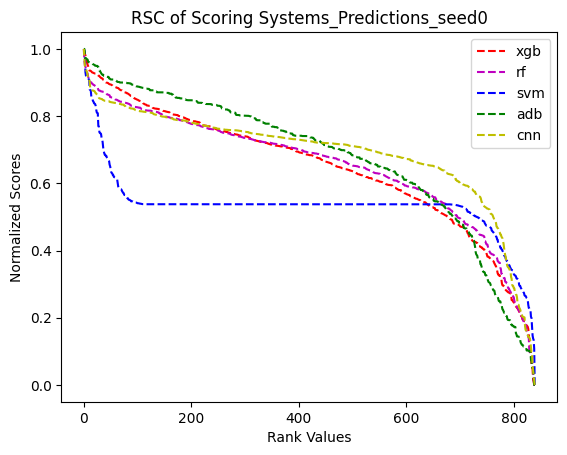

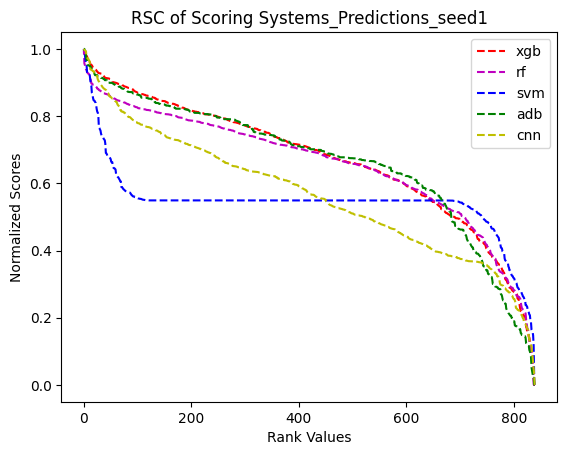

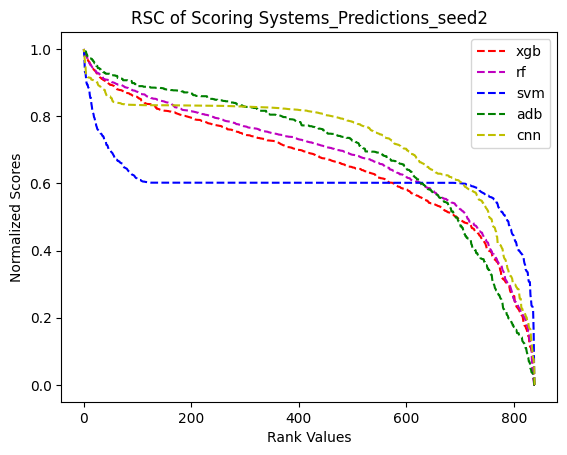

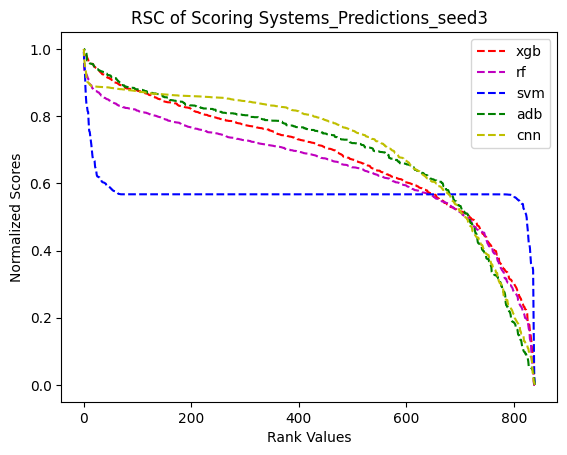

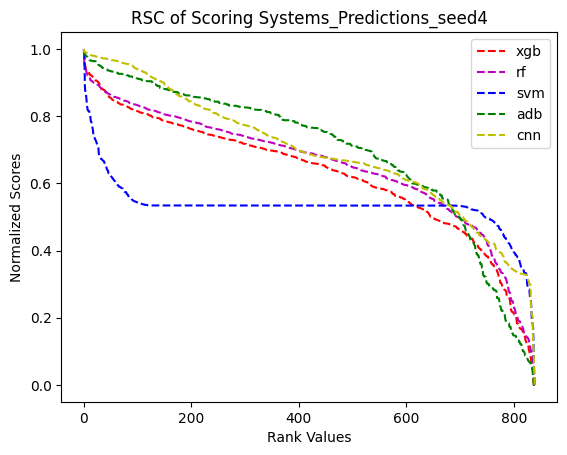

In [119]:
# RSC graphs
colors = ['r--', 'm--', 'b--', 'g--', 'y--']
ranks = np.flip(np.arange(len(predictions_xgb[0])))

for seed in range(len(globals()['predictions_list_%s' % sys])):
  for z in range(len(scoreSys)):
    globals()['line%s' % (z+1)] = plt.plot(ranks, np.sort(normalize(globals()['predictions_%s' % scoreSys[z]][seed])), colors[z], label = scoreSys[z])
    plt.legend(loc = 'upper right')
    plt.title('RSC of Scoring Systems_Predictions_seed%s' % seed)
    plt.xlabel('Rank Values')
    plt.ylabel('Normalized Scores')
  plt.show()


In [120]:
ds_score = [[] for _ in range(5)]

In [121]:
for sys in scoreSys:
  for seed in range(len(ds_score)):
    loc = scoreSys.index(sys)
    scoreSys.remove(sys)
    ds = 0
    for i in range(len(scoreSys)):
      ds += np.sum(np.square(normalize(np.sort(globals()['predictions_%s' % sys][seed]))-normalize(np.sort(globals()['predictions_%s' % scoreSys[i]][seed]))))
    ds = ds/len(scoreSys)
    scoreSys.insert(loc, sys)
    ds_score[seed].append(ds)

In [122]:
ds_score

[[7.954619337835998,
  7.119877100972027,
  28.472211823862786,
  12.364704385981499,
  10.115445958207339],
 [9.88845381284365,
  8.015675381201632,
  22.735252970012212,
  10.63692250492048,
  11.460565826933289],
 [7.161061627163178,
  6.7089475718947345,
  24.19007714580318,
  10.963121700663553,
  10.327788331418555],
 [9.8337892034513,
  8.671342043982918,
  37.14029071158696,
  12.549949703012008,
  14.545449642168132],
 [8.779497070258351,
  8.535820055212474,
  34.445625518961975,
  16.241819669375225,
  12.8998858956162]]

In [123]:
ds_rank = np.reciprocal(ds_score)

In [124]:
def mean_absolute_error(y_pred, y_test):
  res = np.mean(np.abs(y_pred - y_test))
  return res

In [125]:
ps_score = [[] for _ in range(5)]

In [126]:
for sys in scoreSys:
  for seed in range(len(ps_score)):
    ps = mean_absolute_error(globals()['predictions_%s' % sys][seed], y_test)
    ps_score[seed].append(ps)

In [127]:
def powerset(s):
    x = len(s)
    ls = []
    for i in range(1 << x):
        ls.append([s[j] for j in range(x) if (i & (1 << j))])
    return ls[1:]

models = powerset(scoreSys)

def myFunc(e):
  return len(e)

models.sort(key=myFunc)

models_list = []
for i in range(len(models)):
  if len(models[i]) == 1:
    models_list.append(models[i][0])
  elif len(models[i]) == 2:
    models_list.append(models[i][0]+'&'+models[i][1])
  elif len(models[i]) == 3:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2])
  elif len(models[i]) == 4:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3])
  elif len(models[i]) == 5:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3]+'&'+models[i][4])

# Perform average score combinations

In [128]:
avg_score_combine_seed1 = pd.DataFrame({'xgb':predictions_xgb[0], 'rf':predictions_rf[0], 'svm':predictions_svm[0], 'adb':predictions_adb[0], 'cnn':predictions_cnn[0]})
avg_score_combine_seed2 = pd.DataFrame({'xgb':predictions_xgb[1], 'rf':predictions_rf[1], 'svm':predictions_svm[1], 'adb':predictions_adb[1], 'cnn':predictions_cnn[1]})
avg_score_combine_seed3 = pd.DataFrame({'xgb':predictions_xgb[2], 'rf':predictions_rf[2], 'svm':predictions_svm[2], 'adb':predictions_adb[2], 'cnn':predictions_cnn[2]})
avg_score_combine_seed4 = pd.DataFrame({'xgb':predictions_xgb[3], 'rf':predictions_rf[3], 'svm':predictions_svm[3], 'adb':predictions_adb[3], 'cnn':predictions_cnn[3]})
avg_score_combine_seed5 = pd.DataFrame({'xgb':predictions_xgb[4], 'rf':predictions_rf[4], 'svm':predictions_svm[4], 'adb':predictions_adb[4], 'cnn':predictions_cnn[4]})

In [129]:
def avg_score_combine(models_list, single_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]+single_score[j.split('&')[4]]) / 5

In [130]:
avg_score_combine(models_list, avg_score_combine_seed1)
avg_score_combine(models_list, avg_score_combine_seed2)
avg_score_combine(models_list, avg_score_combine_seed3)
avg_score_combine(models_list, avg_score_combine_seed4)
avg_score_combine(models_list, avg_score_combine_seed5)

# Perform average rank combinations

In [131]:
avg_rank_combine_seed1 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[0]), 'rf':score_to_rank(predictions_rf[0]), 'svm':score_to_rank(predictions_svm[0]), 'adb':score_to_rank(predictions_adb[0]), 'cnn':score_to_rank(predictions_cnn[0])})
avg_rank_combine_seed2 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[1]), 'rf':score_to_rank(predictions_rf[1]), 'svm':score_to_rank(predictions_svm[1]), 'adb':score_to_rank(predictions_adb[1]), 'cnn':score_to_rank(predictions_cnn[1])})
avg_rank_combine_seed3 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[2]), 'rf':score_to_rank(predictions_rf[2]), 'svm':score_to_rank(predictions_svm[2]), 'adb':score_to_rank(predictions_adb[2]), 'cnn':score_to_rank(predictions_cnn[2])})
avg_rank_combine_seed4 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[3]), 'rf':score_to_rank(predictions_rf[3]), 'svm':score_to_rank(predictions_svm[3]), 'adb':score_to_rank(predictions_adb[3]), 'cnn':score_to_rank(predictions_cnn[3])})
avg_rank_combine_seed5 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[4]), 'rf':score_to_rank(predictions_rf[4]), 'svm':score_to_rank(predictions_svm[4]), 'adb':score_to_rank(predictions_adb[4]), 'cnn':score_to_rank(predictions_cnn[4])})

In [132]:
def avg_rank_combine(models_list, single_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]+single_rank[j.split('&')[4]]) / 5

In [133]:
avg_rank_combine(models_list, avg_rank_combine_seed1)
avg_rank_combine(models_list, avg_rank_combine_seed2)
avg_rank_combine(models_list, avg_rank_combine_seed3)
avg_rank_combine(models_list, avg_rank_combine_seed4)
avg_rank_combine(models_list, avg_rank_combine_seed5)

# Perform weighted score combination by diversity strength

In [134]:
ds_score_combine_seed1 = pd.DataFrame()
ds_score_combine_seed2 = pd.DataFrame()
ds_score_combine_seed3 = pd.DataFrame()
ds_score_combine_seed4 = pd.DataFrame()
ds_score_combine_seed5 = pd.DataFrame()

In [135]:
def ds_score_combine(models_list, single_score, ds_score_combine, ds_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])]+single_score[j.split('&')[4]]*ds_score[scoreSys.index(j.split('&')[4])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])] + ds_score[scoreSys.index(j.split('&')[4])])

In [136]:
ds_score_combine(models_list, avg_score_combine_seed1, ds_score_combine_seed1, ds_score[0])
ds_score_combine(models_list, avg_score_combine_seed2, ds_score_combine_seed2, ds_score[1])
ds_score_combine(models_list, avg_score_combine_seed3, ds_score_combine_seed3, ds_score[2])
ds_score_combine(models_list, avg_score_combine_seed4, ds_score_combine_seed4, ds_score[3])
ds_score_combine(models_list, avg_score_combine_seed5, ds_score_combine_seed5, ds_score[4])

# Perform weighted rank combination by diversity strength

In [137]:
ds_rank_combine_seed1 = pd.DataFrame()
ds_rank_combine_seed2 = pd.DataFrame()
ds_rank_combine_seed3 = pd.DataFrame()
ds_rank_combine_seed4 = pd.DataFrame()
ds_rank_combine_seed5 = pd.DataFrame()

In [138]:
def ds_rank_combine(models_list, single_rank, ds_rank_combine, ds_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])]+single_rank[j.split('&')[4]]*ds_rank[scoreSys.index(j.split('&')[4])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])] + ds_rank[scoreSys.index(j.split('&')[4])])

In [139]:
ds_rank_combine(models_list, avg_rank_combine_seed1, ds_rank_combine_seed1, ds_rank[0])
ds_rank_combine(models_list, avg_rank_combine_seed2, ds_rank_combine_seed2, ds_rank[1])
ds_rank_combine(models_list, avg_rank_combine_seed3, ds_rank_combine_seed3, ds_rank[2])
ds_rank_combine(models_list, avg_rank_combine_seed4, ds_rank_combine_seed4, ds_rank[3])
ds_rank_combine(models_list, avg_rank_combine_seed5, ds_rank_combine_seed5, ds_rank[4])

# Perform weighted score combination by performance strength (MAE)

In [140]:
ps_score_combine_seed1 = pd.DataFrame()
ps_score_combine_seed2 = pd.DataFrame()
ps_score_combine_seed3 = pd.DataFrame()
ps_score_combine_seed4 = pd.DataFrame()
ps_score_combine_seed5 = pd.DataFrame()

In [141]:
def ps_score_combine(models_list, single_score, ps_score_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])])+single_score[j.split('&')[4]]*(1 / ps_score[scoreSys.index(j.split('&')[4])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + 1 / ps_score[scoreSys.index(j.split('&')[3])] + 1 / ps_score[scoreSys.index(j.split('&')[4])])

In [142]:
ps_score_combine(models_list, avg_score_combine_seed1, ps_score_combine_seed1, ps_score[0])
ps_score_combine(models_list, avg_score_combine_seed2, ps_score_combine_seed2, ps_score[1])
ps_score_combine(models_list, avg_score_combine_seed3, ps_score_combine_seed3, ps_score[2])
ps_score_combine(models_list, avg_score_combine_seed4, ps_score_combine_seed4, ps_score[3])
ps_score_combine(models_list, avg_score_combine_seed5, ps_score_combine_seed5, ps_score[4])

# Perform weighted rank combination by performance strength

In [143]:
ps_rank_combine_seed1 = pd.DataFrame()
ps_rank_combine_seed2 = pd.DataFrame()
ps_rank_combine_seed3 = pd.DataFrame()
ps_rank_combine_seed4 = pd.DataFrame()
ps_rank_combine_seed5 = pd.DataFrame()

In [144]:
def ps_rank_combine(models_list, single_rank, ps_rank_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])])+single_rank[j.split('&')[4]]*(ps_score[scoreSys.index(j.split('&')[4])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])] + ps_score[scoreSys.index(j.split('&')[4])])

In [145]:
ps_rank_combine(models_list, avg_rank_combine_seed1, ps_rank_combine_seed1, ps_score[0])
ps_rank_combine(models_list, avg_rank_combine_seed2, ps_rank_combine_seed2, ps_score[1])
ps_rank_combine(models_list, avg_rank_combine_seed3, ps_rank_combine_seed3, ps_score[2])
ps_rank_combine(models_list, avg_rank_combine_seed4, ps_rank_combine_seed4, ps_score[3])
ps_rank_combine(models_list, avg_rank_combine_seed5, ps_rank_combine_seed5, ps_score[4])

In [146]:
avg_rank_combine_seed1.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed2.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed3.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed4.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed5.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)

# Calculate MAE

In [147]:
score_combine_list = np.hstack((np.array(avg_score_combine_seed1.columns), np.array(ds_score_combine_seed1.columns), np.array(ps_score_combine_seed1.columns)))
MAE = pd.DataFrame(index = score_combine_list)
for i in range(1, 6):
  mae_avg, mae_ds, mae_ps = [], [], []
  for col in globals()['avg_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['avg_score_combine_seed%s' %i][col]), y_test)
    mae_avg.append(mae)
  for col in globals()['ds_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ds_score_combine_seed%s' %i][col]), y_test)
    mae_ds.append(mae)
  for col in globals()['ps_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ps_score_combine_seed%s' %i][col]), y_test)
    mae_ps.append(mae)
  MAE['seed'+str(i)] = np.hstack((mae_avg, mae_ds, mae_ps))

In [148]:
pd.set_option('display.max_rows', None)

In [149]:
MAE['avg_MAE'] = MAE.mean(axis=1)

In [150]:
MAE.sort_values(by='avg_MAE')

,seed1,seed2,seed3,seed4,seed5,avg_MAE
xgb,0.589299,0.604115,0.599023,0.587401,0.608008,0.597569
xgb&rf_ds,0.603975,0.611583,0.610367,0.600158,0.621722,0.609561
xgb&rf_ps,0.604386,0.612687,0.610444,0.600731,0.621281,0.609906
xgb&rf,0.605215,0.613021,0.610968,0.601668,0.622026,0.610580
xgb&rf&adb&cnn_ps,0.621750,0.632682,0.617940,0.603522,0.617927,0.618764
xgb&rf&svm&adb_ps,0.621806,0.637365,0.622060,0.616289,0.631176,0.625739
xgb&rf&cnn_ps,0.615249,0.647747,0.617043,0.614451,0.644416,0.627781
xgb&rf&adb_ps,0.630109,0.643079,0.634486,0.625167,0.641606,0.634890
xgb&rf&cnn,0.630560,0.660484,0.620756,0.619251,0.650488,0.636308
xgb&rf&svm&cnn_ps,0.645546,0.646267,0.635954,0.627813,0.630471,0.637210
